In [2]:
import pandas as pd
import numpy as np  

# Load the dataset
df = pd.read_csv("NVIDIA_STOCK.csv")

# Display basic information and the first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1699 non-null   object
 1   Adj Close  1698 non-null   object
 2   Close      1698 non-null   object
 3   High       1698 non-null   object
 4   Low        1698 non-null   object
 5   Open       1698 non-null   object
 6   Volume     1698 non-null   object
dtypes: object(7)
memory usage: 93.0+ KB


In [3]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000


In [4]:
# Remove the first two rows (metadata)
df.drop([0,1],axis=0,inplace=True)

# Rename columns for clarity
df.columns = ["Date", "Adj_Close", "Close", "High", "Low", "Open", "Volume"]

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Convert numeric columns to float
numeric_cols = ["Adj_Close", "Close", "High", "Low", "Open", "Volume"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Drop any remaining NaN values
df.dropna(inplace=True)

# Display cleaned dataset info and first few rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 2 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1697 non-null   datetime64[ns]
 1   Adj_Close  1697 non-null   float64       
 2   Close      1697 non-null   float64       
 3   High       1697 non-null   float64       
 4   Low        1697 non-null   float64       
 5   Open       1697 non-null   float64       
 6   Volume     1697 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.9 KB


In [5]:
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume
2,2018-01-02,4.929880,4.98375,4.98750,4.86250,4.89450,355616000
3,2018-01-03,5.254335,5.31175,5.34250,5.09375,5.10250,914704000
4,2018-01-04,5.282033,5.33975,5.45125,5.31725,5.39400,583268000
5,2018-01-05,5.326794,5.38500,5.42275,5.27700,5.35475,580124000
6,2018-01-08,5.490012,5.55000,5.62500,5.46450,5.51000,881216000


<Axes: >

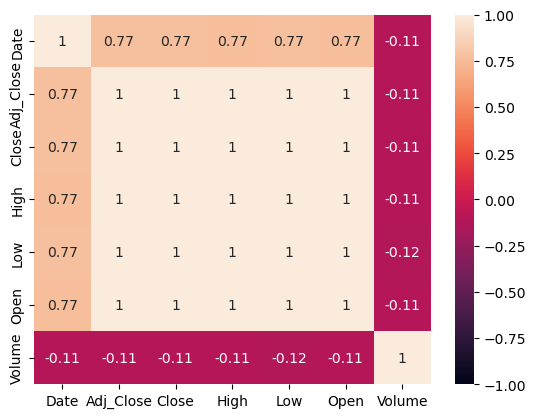

In [6]:
import seaborn as sns
corr = df.corr()
sns.heatmap(data=corr,annot=True,vmin=-1, vmax=1)

In [7]:
corr

,Date,Adj_Close,Close,High,Low,Open,Volume
Date,1.000000,0.766104,0.765909,0.765275,0.766219,0.765174,-0.105869
Adj_Close,0.766104,1.000000,1.000000,0.999662,0.999763,0.999329,-0.113866
Close,0.765909,1.000000,1.000000,0.999662,0.999763,0.999330,-0.113864
High,0.765275,0.999662,0.999662,1.000000,0.999673,0.999780,-0.109508
Low,0.766219,0.999763,0.999763,0.999673,1.000000,0.999668,-0.117262
Open,0.765174,0.999329,0.999330,0.999780,0.999668,1.000000,-0.112821
Volume,-0.105869,-0.113866,-0.113864,-0.109508,-0.117262,-0.112821,1.000000


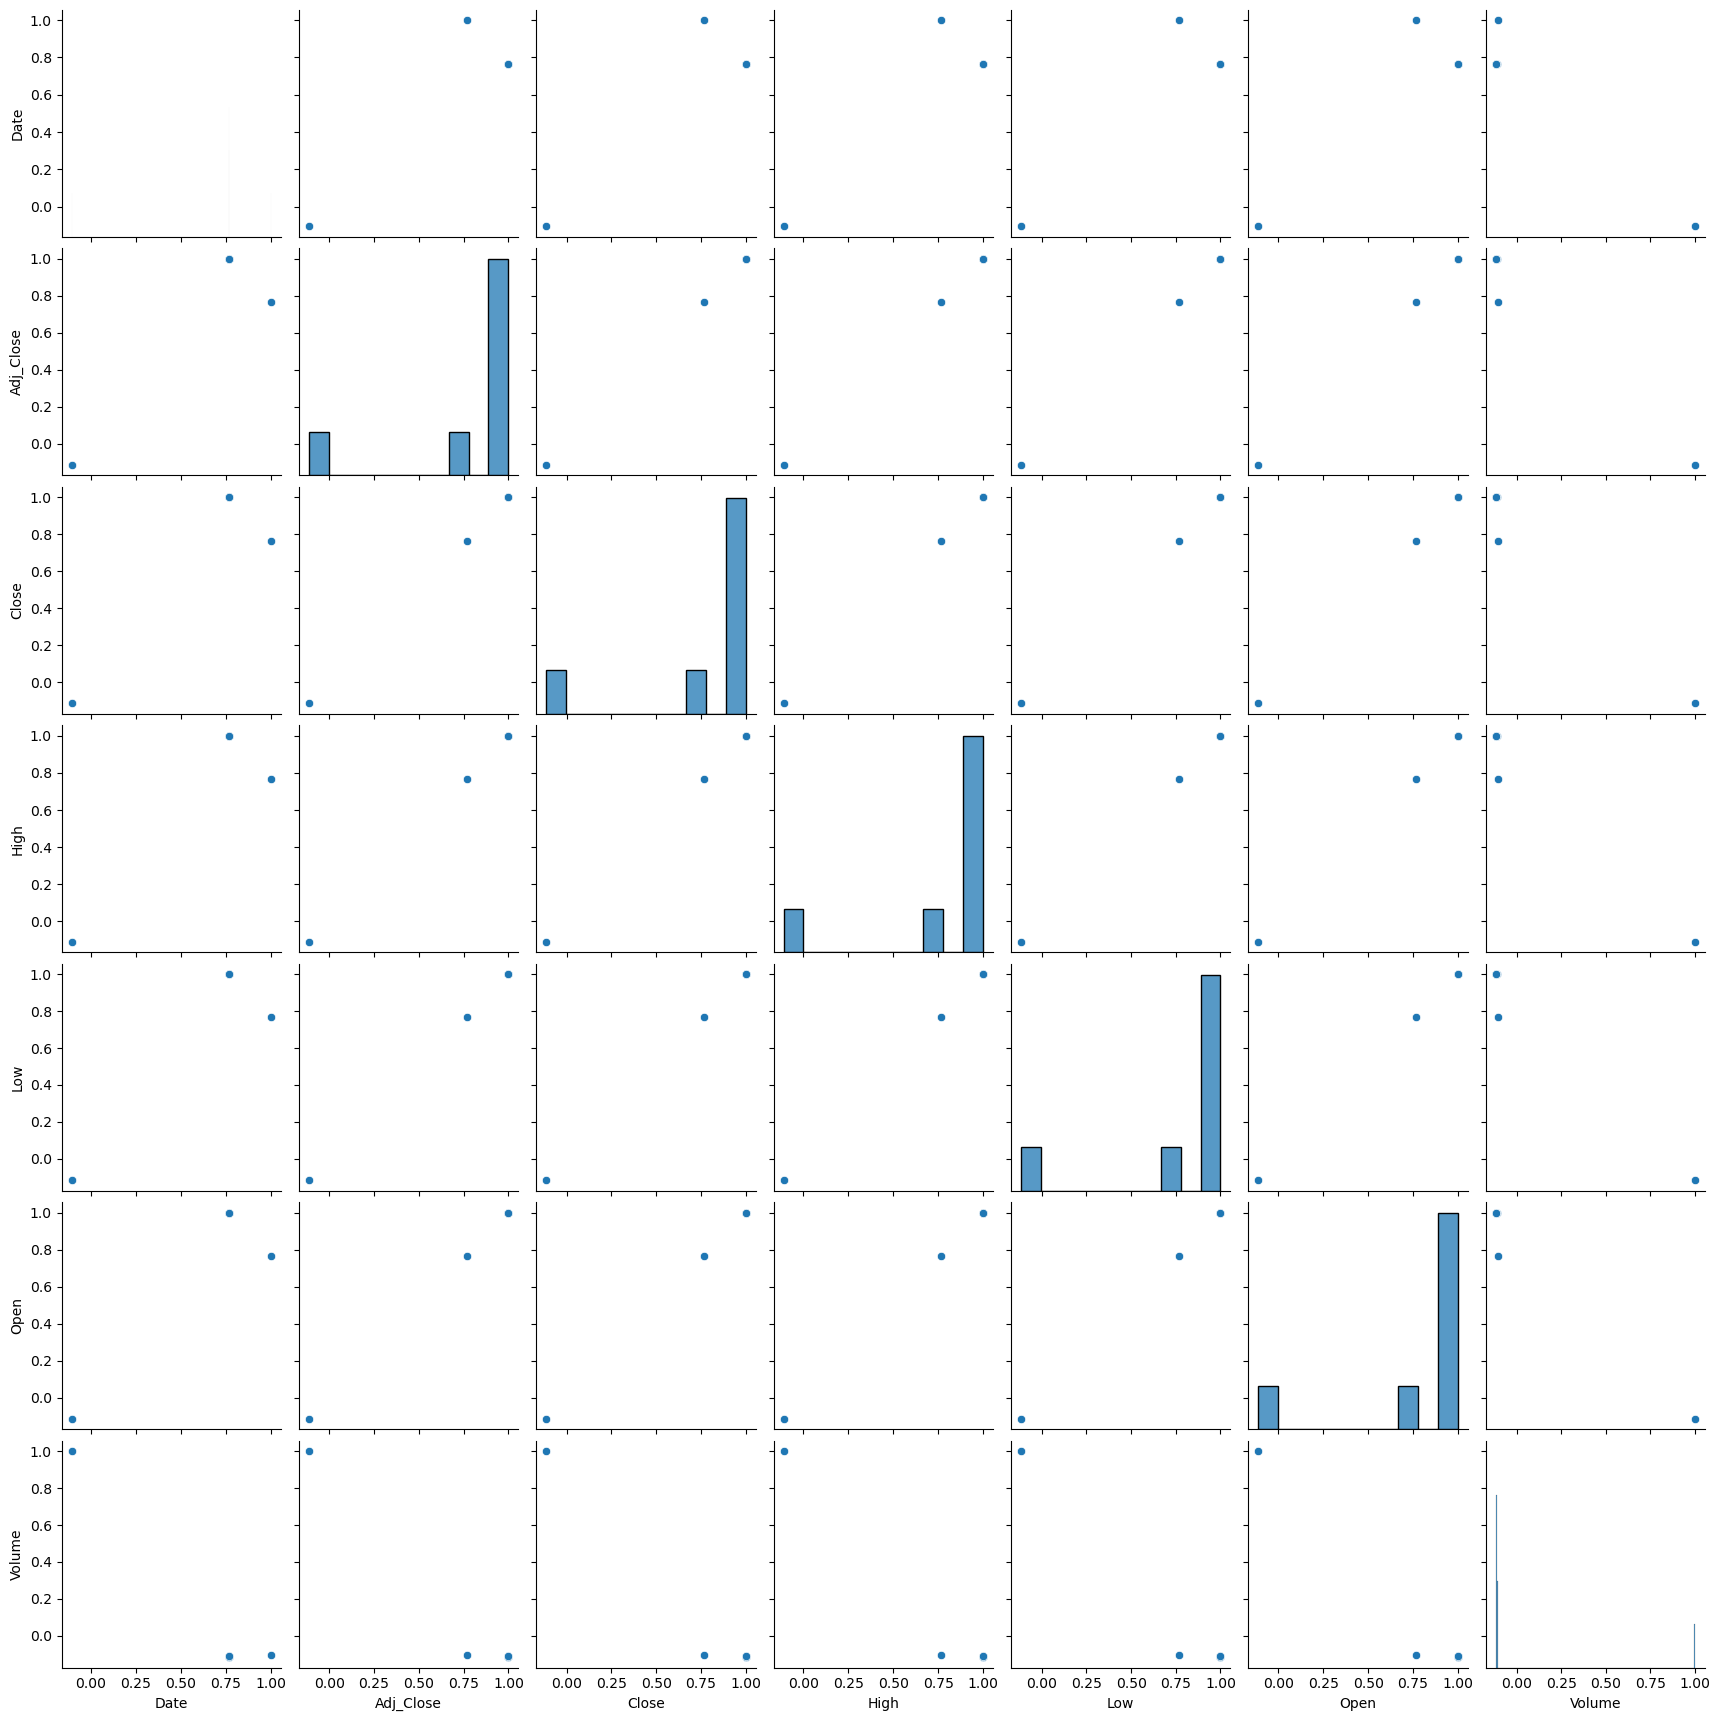

In [8]:
sns.pairplot(corr)

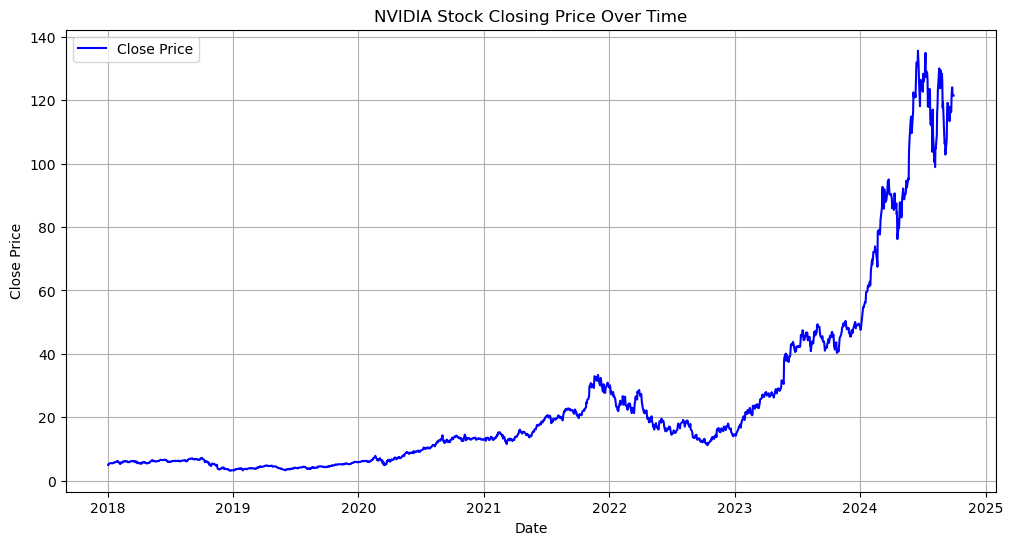

In [9]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("NVIDIA Stock Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Create lag features (previous day's closing prices as input)
df["Close_Lag1"] = df["Close"].shift(1)
df["Close_Lag2"] = df["Close"].shift(2)
df["Close_Lag3"] = df["Close"].shift(3)

# Drop rows with NaN values due to shifting
df.dropna(inplace=True)

# Display the dataset with lag features
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume,Close_Lag1,Close_Lag2,Close_Lag3
5,2018-01-05,5.326794,5.3850,5.42275,5.27700,5.35475,580124000,5.33975,5.31175,4.98375
6,2018-01-08,5.490012,5.5500,5.62500,5.46450,5.51000,881216000,5.38500,5.33975,5.31175
7,2018-01-09,5.488528,5.5485,5.59550,5.46600,5.55550,497000000,5.55000,5.38500,5.33975
8,2018-01-10,5.531557,5.5920,5.59550,5.40000,5.45500,582664000,5.54850,5.55000,5.38500
9,2018-01-11,5.541448,5.6020,5.65675,5.58025,5.62500,406032000,5.59200,5.54850,5.55000


In [11]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
features = ["Close_Lag1", "Close_Lag2", "Close_Lag3"]
X = df[features]
y = df["Close"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate model performance
#rmse = np.sqr(mean_squared_error(y_test, y_pred, squared=False))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

rmse_lr

2.8167353084687483

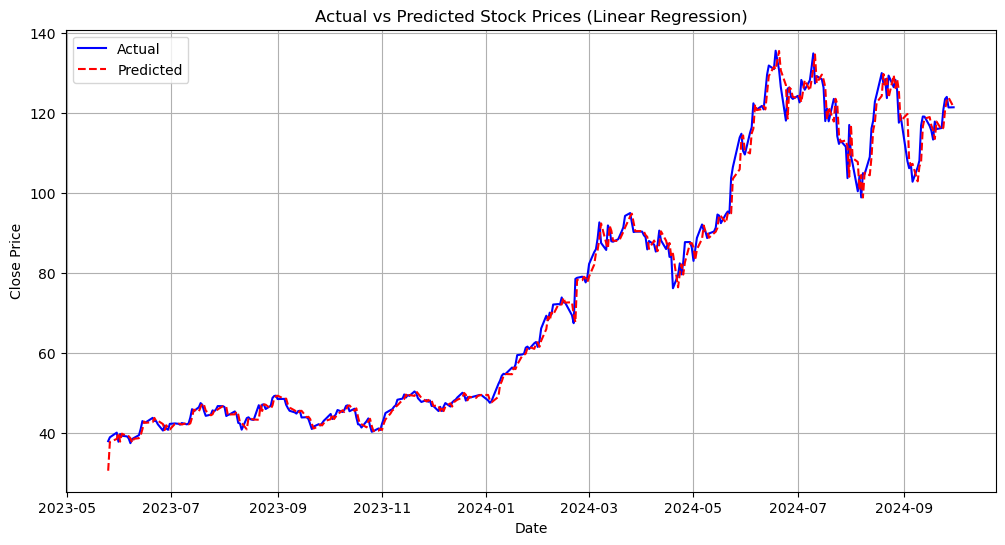

In [12]:
# Plot actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(df["Date"].iloc[-len(y_test):], y_test, label="Actual", color="blue")
plt.plot(df["Date"].iloc[-len(y_test):], y_pred_lr, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Stock Prices (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
#rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rmse_rf

52.45768230408834

In [14]:
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume,Close_Lag1,Close_Lag2,Close_Lag3
5,2018-01-05,5.326794,5.3850,5.42275,5.27700,5.35475,580124000,5.33975,5.31175,4.98375
6,2018-01-08,5.490012,5.5500,5.62500,5.46450,5.51000,881216000,5.38500,5.33975,5.31175
7,2018-01-09,5.488528,5.5485,5.59550,5.46600,5.55550,497000000,5.55000,5.38500,5.33975
8,2018-01-10,5.531557,5.5920,5.59550,5.40000,5.45500,582664000,5.54850,5.55000,5.38500
9,2018-01-11,5.541448,5.6020,5.65675,5.58025,5.62500,406032000,5.59200,5.54850,5.55000


In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare data for ARIMA (Using Close Prices)
train_size = int(len(df) * 0.8)
train, test = df["Close"][:train_size], df["Close"][train_size:]

# Fit ARIMA model (AutoRegressive = 3, Differencing = 1, Moving Average = 2)
arima_model = ARIMA(train, order=(3, 1, 2))
arima_result = arima_model.fit()

# Make predictions
y_pred_arima = arima_result.forecast(steps=len(test))

# Evaluate model performance
#rmse_arima = mean_squared_error(test, y_pred_arima, squared=False)
rmse_arima = np.sqrt(mean_squared_error(test, y_pred_arima))
rmse_arima


c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationar

53.51987774180434

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (AR=3, I=1, MA=2 with Seasonality of 12)
sarima_model = SARIMAX(train, order=(3, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Make predictions
y_pred_sarima = sarima_result.forecast(steps=len(test))

# Evaluate model performance
#rmse_sarima = mean_squared_error(test, y_pred_sarima, squared=False)
rmse_sarima = np.sqrt(mean_squared_error(test, y_pred_sarima))
rmse_sarima

c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. U

50.085464322733074

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model (Triple Exponential Smoothing)
ets_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
ets_result = ets_model.fit()

# Make predictions
y_pred_ets = ets_result.forecast(steps=len(test))

# Evaluate model performance
#rmse_ets = mean_squared_error(test, y_pred_ets, squared=False)
rmse_ets = np.sqrt(mean_squared_error(test, y_pred_ets))
rmse_ets

c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hulkh\anaconda3\envs\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


50.265616219375545

In [18]:
import numpy as np
import pandas as pd
import warnings
from pmdarima import auto_arima
from joblib import Parallel, delayed  # Parallel processing

warnings.filterwarnings("ignore")  # Ignore warnings

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=True)  # Ensure Date parsing

df.drop([0,1], axis=0,inplace=True)

y = df["Close"].dropna().values  # Convert to NumPy for speed

# Function to find the best Auto-ARIMA model
def find_best_arima(y):
    """Runs auto_arima with optimized settings for faster computation."""
    model = auto_arima(
        y,
        seasonal=True, m=12,  # Monthly seasonality
        stepwise=True,  # Fast search mode
        suppress_warnings=True,
        error_action="ignore",
        trace=False,  # Disable console output for speed
        n_jobs=-1,  # Use all available cores
        maxiter=10,  # Reduce iterations for speed
        fast=True  # Optimized speed mode
    )
    return model

# Run Auto-ARIMA with parallel processing
best_model = find_best_arima(y)

# Print best model summary
print(best_model.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1697
Model:             SARIMAX(2, 2, 1)x(1, 0, [], 12)   Log Likelihood               -2875.521
Date:                             Mon, 24 Mar 2025   AIC                           5761.041
Time:                                     21:52:25   BIC                           5788.219
Sample:                                          0   HQIC                          5771.104
                                            - 1697                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0908      0.009    -10.067      0.000      -0.108      -0.073
ar.L2          0.0346      

In [19]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(df["Close"]))

(1.638120203391151, 0.997967550949341, 25, 1671, {'1%': -3.4342694338297464, '5%': -2.863271207750943, '10%': -2.567691652321558}, 5555.446935781175)


In [20]:
adfuller(df["Close"])

(1.638120203391151,
 0.997967550949341,
 25,
 1671,
 {'1%': -3.4342694338297464,
  '5%': -2.863271207750943,
  '10%': -2.567691652321558},
 5555.446935781175)

In [21]:
# Convert "Close" column to numeric (fixes string issues)
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

# Drop NaN values (if any conversion failed)
df.dropna(subset=["Close"], inplace=True)

# Now apply log and difference transformations
df["Close_Log"] = np.log(df["Close"])
df["Close_Diff"] = df["Close"].diff()

# Display the first few rows
df["Close_Log"].head()


2    1.606183
3    1.669921
4    1.675179
5    1.683617
6    1.713798
Name: Close_Log, dtype: float64

In [22]:
df["Close_Diff"].head()

2        NaN
3    0.32800
4    0.02800
5    0.04525
6    0.16500
Name: Close_Diff, dtype: float64

## 2. Use More Features for Machine Learning & Deep Learning
* Right now, we are using only lagged close prices.
* Adding technical indicators can improve ML models:
> Moving Averages (MA):

In [23]:
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_10"]

2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
           ...    
1694    117.189001
1695    117.849001
1696    118.339001
1697    118.569001
1698    119.035001
Name: SMA_10, Length: 1697, dtype: float64

In [24]:
df["Price_Change"] = df["Close"].diff()
df["Gain"] = df["Price_Change"].where(df["Price_Change"] > 0, 0)
df["Loss"] = -df["Price_Change"].where(df["Price_Change"] < 0, 0)
df["Avg_Gain"] = df["Gain"].rolling(14).mean()
df["Avg_Loss"] = df["Loss"].rolling(14).mean()
df["RSI"] = 100 - (100 / (1 + (df["Avg_Gain"] / df["Avg_Loss"])))

In [25]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume,Close_Log,Close_Diff,SMA_10,Price_Change,Gain,Loss,Avg_Gain,Avg_Loss,RSI
2,2018-01-02,4.929879665374756,4.98375,4.987500190734863,4.862500190734863,4.894499778747559,355616000,1.606183,NaN,NaN,NaN,0.00000,-0.0,NaN,NaN,NaN
3,2018-01-03,5.254334926605225,5.31175,5.34250020980835,5.09375,5.102499961853027,914704000,1.669921,0.32800,NaN,0.32800,0.32800,-0.0,NaN,NaN,NaN
4,2018-01-04,5.2820329666137695,5.33975,5.451250076293945,5.317249774932861,5.394000053405762,583268000,1.675179,0.02800,NaN,0.02800,0.02800,-0.0,NaN,NaN,NaN
5,2018-01-05,5.326793670654297,5.38500,5.422749996185303,5.2769999504089355,5.354750156402588,580124000,1.683617,0.04525,NaN,0.04525,0.04525,-0.0,NaN,NaN,NaN
6,2018-01-08,5.490012168884277,5.55000,5.625,5.4644999504089355,5.510000228881836,881216000,1.713798,0.16500,NaN,0.16500,0.16500,-0.0,NaN,NaN,NaN


In [26]:
# Add Simple Moving Average (SMA)
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()

# Add Exponential Moving Average (EMA)
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()
df["EMA_50"] = df["Close"].ewm(span=50, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
delta = df["Close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()

rs = avg_gain / avg_loss
df["RSI"] = 100 - (100 / (1 + rs))

# Compute MACD (Moving Average Convergence Divergence)
short_ema = df["Close"].ewm(span=12, adjust=False).mean()
long_ema = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = short_ema - long_ema
df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

# Drop NaN values due to rolling calculations
df.dropna(inplace=True)

# Display updated dataframe with new features
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume,Close_Log,Close_Diff,SMA_10,...,Gain,Loss,Avg_Gain,Avg_Loss,RSI,SMA_50,EMA_10,EMA_50,MACD,MACD_Signal
51,2018-03-14,6.155107498168945,6.2185,6.263750076293945,6.1554999351501465,6.236249923706055,505496000,1.827529,0.02575,6.052800,...,0.02575,-0.000,0.044429,0.032661,54.817190,5.848435,6.114369,5.825796,0.097106,0.091410
52,2018-03-15,6.169955253601074,6.2335,6.315499782562256,6.190999984741211,6.232250213623047,401952000,1.829938,0.01500,6.095625,...,0.01500,-0.000,0.038750,0.032661,44.882677,5.873430,6.136029,5.841784,0.100618,0.093251
53,2018-03-16,6.198163986206055,6.2620,6.28125,6.211999893188477,6.25,399456000,1.834500,0.02850,6.130475,...,0.02850,-0.000,0.039625,0.032661,57.023721,5.892435,6.158933,5.858263,0.104496,0.095500
54,2018-03-19,5.96358060836792,6.0250,6.233749866485596,5.925000190734863,6.204500198364258,713772000,1.795917,-0.23700,6.143850,...,0.00000,0.237,0.039625,0.048661,68.090307,5.906140,6.134582,5.864802,0.087438,0.093888
55,2018-03-20,6.1758928298950195,6.2395,6.278749942779541,6.0279998779296875,6.0279998779296875,554696000,1.830900,0.21450,6.162400,...,0.21450,-0.000,0.054946,0.041411,55.581252,5.923230,6.153658,5.879496,0.090188,0.093148


Technical Indicators
* SMA_10 & SMA_50 – Simple Moving Averages
* EMA_10 & EMA_50 – Exponential Moving Averages
* RSI (Relative Strength Index) – Measures momentum
* MACD & MACD_Signal – Tracks trend strength


In [27]:
from xgboost import XGBRegressor

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
#rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_xgb

52.662416088538734

In [28]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=True)
df.set_index(df["Price"], inplace=True)  # Set Date as index

# Ensure 'Close' is numeric
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
df.dropna(subset=["Close"], inplace=True)

# Create Lag Features
df["Close_Lag1"] = df["Close"].shift(1)
df["Close_Lag2"] = df["Close"].shift(2)
df["Close_Lag3"] = df["Close"].shift(3)

# Create Moving Averages
df["SMA_10"] = df["Close"].rolling(window=10).mean()
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()
df["EMA_50"] = df["Close"].ewm(span=50, adjust=False).mean()

# Compute RSI (Optimized)
window_length = 14
delta = df["Close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / (loss + 1e-10)  # Avoid division by zero
df["RSI"] = 100 - (100 / (1 + rs))

# Compute MACD
short_ema = df["Close"].ewm(span=12, adjust=False).mean()
long_ema = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = short_ema - long_ema
df["MACD_Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

# Drop NaN values created by feature engineering
df.dropna(inplace=True)

# Define features and target
features = ["Close_Lag1", "Close_Lag2", "Close_Lag3", "SMA_10", "SMA_50", "EMA_10", "EMA_50", "RSI", "MACD", "MACD_Signal"]
target = "Close"

# Train-Test Split (time-based, no shuffling)
x_train, x_test, Y_train, Y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42, shuffle=False)

# Initialize XGBoost model with better parameters
xgb_model = XGBRegressor(
    n_estimators=500,   # More trees
    learning_rate=0.05,  # Lower LR for better convergence
    max_depth=6,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42
)

# Train model
xgb_model.fit(x_train, Y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate model performance
rmse_xgb = np.sqrt(mean_squared_error(Y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb:.4f}")


XGBoost RMSE: 50.2259


In [29]:
# Recompute RMSE summary
rmse_summary = pd.DataFrame({
    "Model": ["Linear Regression", "ARIMA", "SARIMA", "ETS", "Random Forest","XG Boost"],
    "RMSE": [rmse_lr, rmse_arima, rmse_sarima, rmse_ets, rmse_rf,rmse_xgb]
}).sort_values(by="RMSE")

# Display the RMSE summary
rmse_summary

,Model,RMSE
0,Linear Regression,2.816735
2,SARIMA,50.085464
5,XG Boost,50.225855
3,ETS,50.265616
4,Random Forest,52.457682
1,ARIMA,53.519878


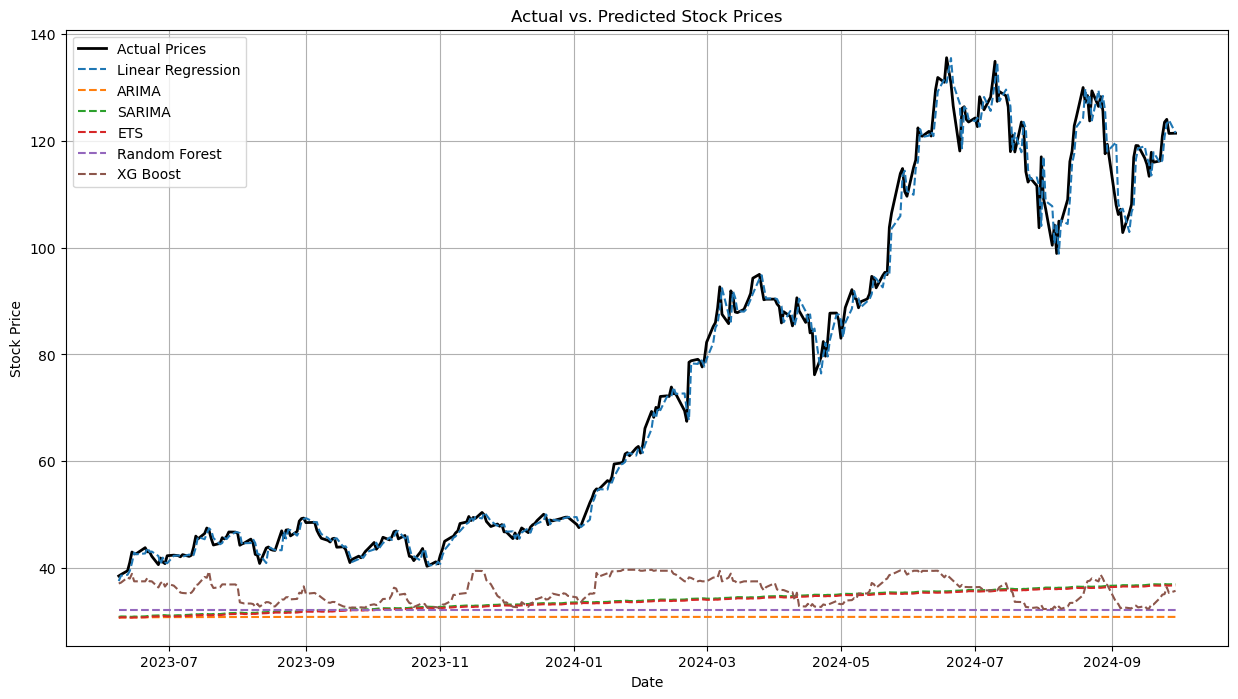

,Model,RMSE
0,Linear Regression,2.816735
2,SARIMA,50.085464
5,XG Boost,50.225855
3,ETS,50.265616
4,Random Forest,52.457682
1,ARIMA,53.519878


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure Date column is correctly referenced
if "Date" in df.columns:
    date_column = df["Date"].iloc[-len(y_test):].values  # Use 'Date' if it exists
else:
    date_column = df.index[-len(y_test):].values  # Use index if 'Date' is not present

# Find the minimum length among all arrays to ensure they match
min_length = min(len(date_column), len(y_test), len(y_pred_lr), len(y_pred_arima), 
                 len(y_pred_sarima), len(y_pred_ets), len(y_pred_rf), len(y_pred_xgb))

# Trim all arrays to the same length
date_column = date_column[-min_length:]
y_test = np.ravel(y_test[-min_length:])
y_pred_lr = np.ravel(y_pred_lr[-min_length:])
y_pred_arima = np.ravel(y_pred_arima[-min_length:])
y_pred_sarima = np.ravel(y_pred_sarima[-min_length:])
y_pred_ets = np.ravel(y_pred_ets[-min_length:])
y_pred_rf = np.ravel(y_pred_rf[-min_length:])
y_pred_xgb = np.ravel(y_pred_xgb[-min_length:])

# Create DataFrame with aligned lengths
predictions_df = pd.DataFrame({
    "Date": date_column,
    "Actual": y_test,
    "Linear Regression": y_pred_lr,
    "ARIMA": y_pred_arima,
    "SARIMA": y_pred_sarima,
    "ETS": y_pred_ets,
    "Random Forest": y_pred_rf,
    "XG Boost": y_pred_xgb
}).set_index("Date")  # Set Date as index

# Convert index to datetime
predictions_df.index = pd.to_datetime(predictions_df.index)

# Plot actual vs. predicted values for each model
plt.figure(figsize=(15, 8))
plt.plot(predictions_df.index, predictions_df["Actual"], label="Actual Prices", color="black", linewidth=2)
plt.plot(predictions_df.index, predictions_df["Linear Regression"], label="Linear Regression", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["ARIMA"], label="ARIMA", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["SARIMA"], label="SARIMA", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["ETS"], label="ETS", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["Random Forest"], label="Random Forest", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["XG Boost"], label="XG Boost", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

# Display RMSE summary
rmse_summary


               Model       RMSE
0  Linear Regression   2.816735
1      Random Forest  52.457682
2           XG Boost  50.225855
3             SARIMA  50.085464
4              ARIMA  53.519878
5                ETS  50.265616


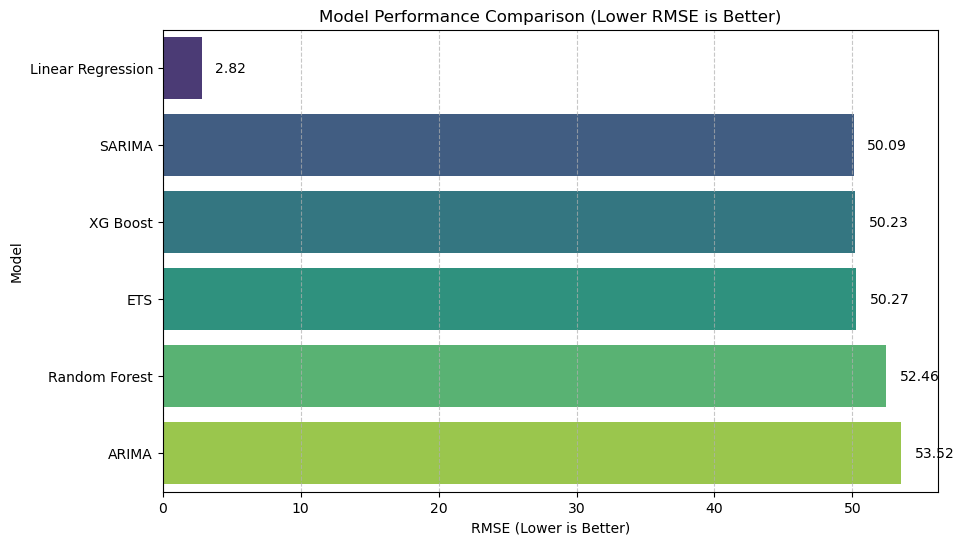

,Model,RMSE
0,Linear Regression,2.816735
1,SARIMA,50.085464
2,XG Boost,50.225855
3,ETS,50.265616
4,Random Forest,52.457682
5,ARIMA,53.519878


In [31]:
# Create a model summary DataFrame (previous results)
model_summary = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XG Boost", "SARIMA", "ARIMA","ETS"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb, rmse_sarima, rmse_arima, rmse_ets],
    #"Status": ["Best ✅", "Poor ❌", "Poor ❌", "Poor ❌", "Needs Tuning 🔄","medium","medium"]
})           

print(model_summary)

# Sort models by RMSE (lower is better)
model_summary = model_summary.sort_values(by="RMSE", ascending=True)

model_summary.reset_index(inplace=True)
model_summary.drop("index",axis=1,inplace=True)

# Plot the RMSE values
plt.figure(figsize=(10, 6))
sns.barplot(x="RMSE", y="Model", data = model_summary, palette="viridis")

# Annotate RMSE values on the bars
for index, row in model_summary.iterrows():
    plt.text(row["RMSE"] + 1, index, f"{row['RMSE']:.2f}", va="center")

plt.xlabel("RMSE (Lower is Better)")
plt.ylabel("Model")
plt.title("Model Performance Comparison (Lower RMSE is Better)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display the summary DataFrame
model_summary


## Hyper-Parameter Tuning
* Code for SARIMA Hyperparameter Tuning

Best SARIMA Model: (1, 1, 1, 1, 1, 1, 30) with AIC: 5660.156740349321
SARIMA Model RMSE: 10.307201735198964


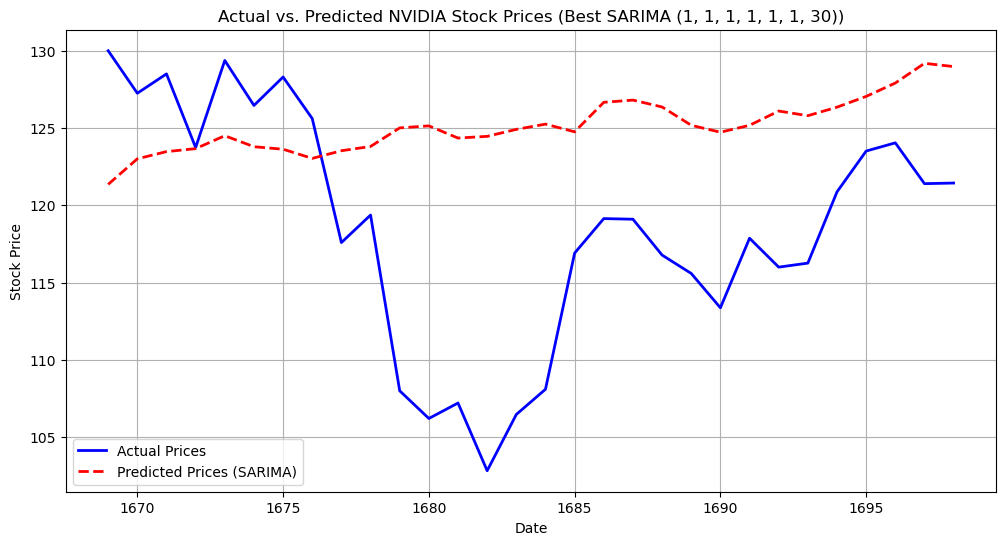

In [32]:
import numpy as np
import pandas as pd
import itertools
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")  # Ignore warnings

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=True)  # Ensure Date is parsed
df.drop([0,1], axis=0, inplace=True)  # Remove unwanted rows

# Select target variable
target_col = "Close"
data = pd.to_numeric(df[target_col], errors="coerce").dropna()  # Convert to numeric and drop NaNs

# Define parameter ranges for SARIMA (Reduced Grid to Prevent MemoryError)
p, d, q = np.arange(2), np.arange(2), np.arange(2)  # AR, Differencing, MA
P, D, Q = np.arange(2), np.arange(2), np.arange(2)  # Seasonal AR, Differencing, MA
S = [30]  # Seasonal period (30 days)

# Generate all possible SARIMA parameter combinations
sarima_combinations = list(itertools.product(p, d, q, P, D, Q, S))

# Initialize best model variables
best_aic = float("inf")
best_sarima = None
best_model = None

# Function to fit SARIMA model
def fit_sarima(params):
    """Fit SARIMA model and return AIC if successful, else return np.inf."""
    p, d, q, P, D, Q, S = params
    try:
        model = sm.tsa.statespace.SARIMAX(
            data,
            order=(p, d, q),
            seasonal_order=(P, D, Q, S),
            enforce_stationarity=False,
            enforce_invertibility=False,
        )
        results = model.fit(disp=False)
        return results.aic, params, results
    except:
        return np.inf, params, None  # Return np.inf if model fails

# Run SARIMA models sequentially to avoid MemoryError
for params in sarima_combinations:
    aic, model_params, model = fit_sarima(params)
    if aic < best_aic:
        best_aic, best_sarima, best_model = aic, model_params, model

# Print best parameters
print(f"Best SARIMA Model: {best_sarima} with AIC: {best_aic}")

# Forecast using the best SARIMA model
predictions = best_model.forecast(steps=30)  # Forecast next 30 days

# Evaluate RMSE
y_test_sarima = data.iloc[-30:]  # Last 30 days for evaluation
rmse_sarima = np.sqrt(mean_squared_error(y_test_sarima, predictions[:30]))

print(f"SARIMA Model RMSE: {rmse_sarima}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_sarima.index, y_test_sarima, label="Actual Prices", color="blue", linewidth=2)
plt.plot(y_test_sarima.index, predictions[:30], label="Predicted Prices (SARIMA)", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Actual vs. Predicted NVIDIA Stock Prices (Best SARIMA {best_sarima})")
plt.legend()
plt.grid()
plt.show()


> * Code for ARIMA Hyperparameter Tuning

Best ARIMA order: (1, 1, 1) with AIC: 5753.479945151241
ARIMA Model RMSE: 7.992842268315197


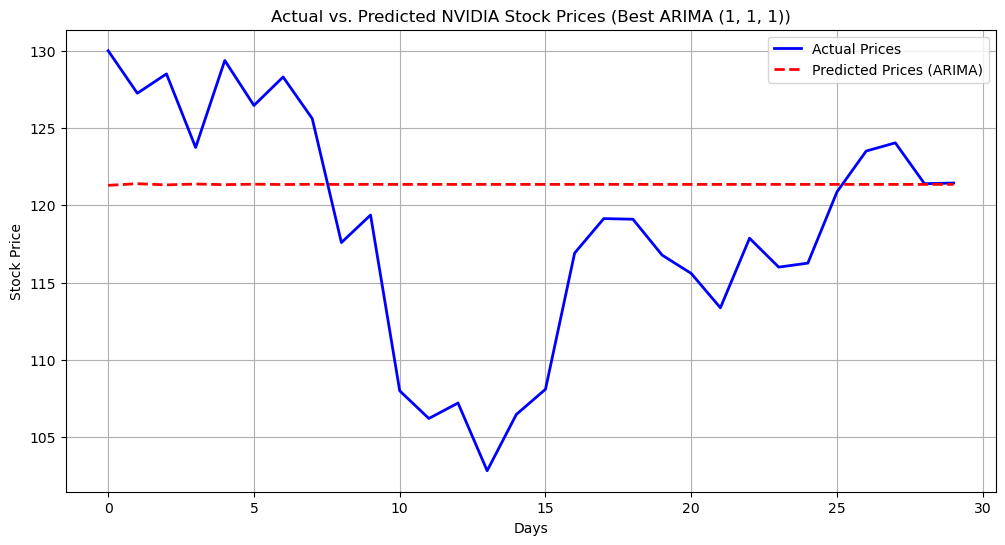

In [33]:
import numpy as np
import pandas as pd
import itertools
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  # Parallel processing for speed

warnings.filterwarnings("ignore")  # Ignore warnings

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=True)

# Drop unwanted rows
df.drop([0, 1], axis=0, inplace=True)

# Convert target column to numeric using NumPy (faster than Pandas)
data = np.array(pd.to_numeric(df["Close"], errors="coerce"))

# Remove NaN values efficiently using NumPy
data = data[~np.isnan(data)]

# Perform differencing using NumPy (faster than Pandas .diff())
data_diff = np.diff(data)  

# Define p, d, q ranges for Grid Search (Reduce the search space for speed)
p = range(0, 3)  # AR terms
d = range(0, 2)  # Differencing terms
q = range(0, 3)  # MA terms

# Generate parameter combinations
pdq_combinations = list(itertools.product(p, d, q))

# Function to evaluate ARIMA model in parallel
def evaluate_arima(param, data):
    """Fits ARIMA model and returns AIC & parameters."""
    try:
        model = sm.tsa.ARIMA(data, order=param).fit()
        return model.aic, param, model
    except:
        return np.inf, param, None  # Return high AIC for failures

# Run ARIMA tuning in parallel (n_jobs=-1 uses all available CPU cores)
results = Parallel(n_jobs=-1)(
    delayed(evaluate_arima)(param, data) for param in pdq_combinations
)

# Find best ARIMA model based on lowest AIC
best_aic, best_pdq, best_model = min(results, key=lambda x: x[0])

# Print best parameters
print(f"Best ARIMA order: {best_pdq} with AIC: {best_aic}")

# Forecast next 30 days using the best ARIMA model
predictions = best_model.forecast(steps=30)

# Get actual values for last 30 days
y_test_arima = data[-30:]

# Compute RMSE (vectorized for speed)
rmse_arima = np.sqrt(np.mean((y_test_arima - predictions[:30])**2))

print(f"ARIMA Model RMSE: {rmse_arima}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_arima, label="Actual Prices", color="blue", linewidth=2)
plt.plot(predictions[:30], label="Predicted Prices (ARIMA)", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title(f"Actual vs. Predicted NVIDIA Stock Prices (Best ARIMA {best_pdq})")
plt.legend()
plt.grid()
plt.show()

> * Code for ETS Hyperparameter Tuning

Best ETS Model: ('add', 'add', None) with AIC: 953.4958720739221
ETS Model RMSE: 8.630453202320574


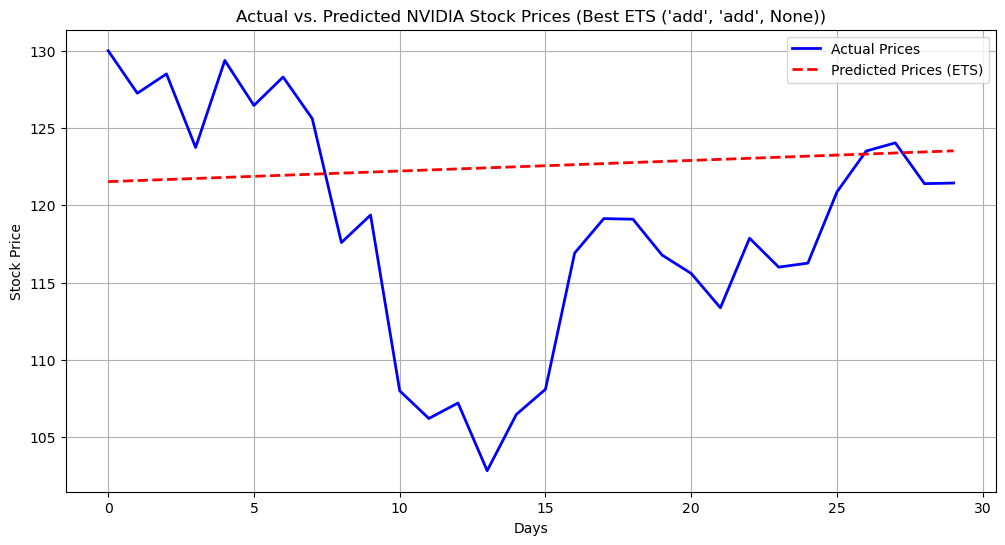

In [34]:
import numpy as np
import pandas as pd
import itertools
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from joblib import Parallel, delayed  # Parallel processing for speed

warnings.filterwarnings("ignore")  # Ignore warnings

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=True)

# Drop unwanted rows
df.drop([0, 1], axis=0, inplace=True)

# Convert target column to numeric using NumPy (faster than Pandas)
data = np.array(pd.to_numeric(df["Close"], errors="coerce"))

# Remove NaN values efficiently using NumPy
data = data[~np.isnan(data)]

# Define ETS components (Reduced Search Space for Speed)
error_types = ["add"]  # Multiplicative models often fail with zero values
trend_types = ["add", None]
seasonal_types = ["add", None]
seasonal_period = 30  # Assuming monthly seasonality

# Generate all possible ETS combinations
ets_combinations = list(itertools.product(error_types, trend_types, seasonal_types))

# Function to evaluate ETS model in parallel
def evaluate_ets(error, trend, seasonal, data):
    """Fits ETS model and returns AIC & parameters."""
    try:
        model = sm.tsa.ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period).fit()
        return model.aic, (error, trend, seasonal), model
    except:
        return np.inf, (error, trend, seasonal), None  # Return high AIC for failures

# Run ETS tuning in parallel (n_jobs=-1 uses all available CPU cores)
results = Parallel(n_jobs=-1)(
    delayed(evaluate_ets)(error, trend, seasonal, data) for error, trend, seasonal in ets_combinations
)

# Find best ETS model based on lowest AIC
best_aic, best_ets, best_model = min(results, key=lambda x: x[0])

# Print best parameters
print(f"Best ETS Model: {best_ets} with AIC: {best_aic}")

# Forecast next 30 days using the best ETS model
predictions = best_model.forecast(steps=30)

# Get actual values for last 30 days
y_test_ets = data[-30:]

# Compute RMSE (vectorized for speed)
rmse_ets = np.sqrt(np.mean((y_test_ets - predictions[:30])**2))

print(f"ETS Model RMSE: {rmse_ets}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_ets, label="Actual Prices", color="blue", linewidth=2)
plt.plot(predictions[:30], label="Predicted Prices (ETS)", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title(f"Actual vs. Predicted NVIDIA Stock Prices (Best ETS {best_ets})")
plt.legend()
plt.grid()
plt.show()


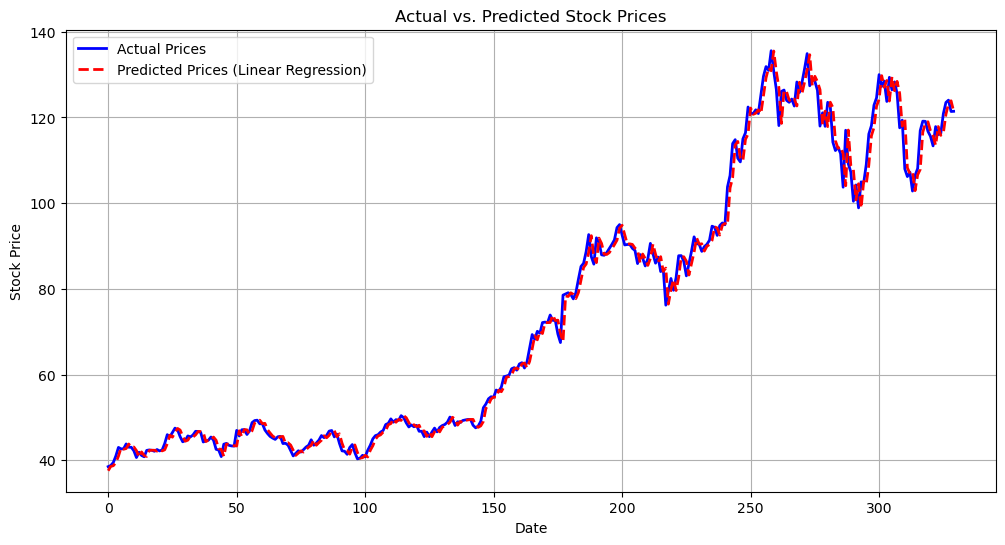

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test is a Pandas Series with a valid index
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test, index=np.arange(len(y_test)))  # Assign a default index if missing

# Ensure y_pred is a 1D array and matches the test set length
y_pred_lr_1 = np.ravel(y_pred_lr[:len(y_test)])  # Trim and flatten
y_test_lr_1 = y_test[:len(y_pred_lr_1)]  # Slice y_test correctly (no .iloc needed)

# Convert y_pred to Pandas Series with the correct index
y_pred_series = pd.Series(y_pred_lr_1, index=y_test_lr_1.index)

# Plot actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_lr_1.index, y_test_lr_1, label="Actual Prices", color="blue", linewidth=2)
plt.plot(y_test_lr_1.index, y_pred_series, label="Predicted Prices (Linear Regression)", color="red", linestyle="dashed", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()


In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
df1 = pd.read_csv("NVIDIA_STOCK.csv",parse_dates=True)

# Convert all columns to numeric, coercing errors to NaN
df1 = df1.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (optional, depending on your needs)
#df.dropna(inplace=True)


# Ensure the target column is numeric and drop any NaN values
df1["Close"] = pd.to_numeric(df1["Close"], errors="coerce")
df1.dropna(subset=["Close"], inplace=True)

#df.drop([0,1],axis=0,inplace=True)

# Define features (X) and target variable (y)
x = df1.drop(columns=["Close"])  # Assuming all other columns are features
Y = df1["Close"]

# Ensure consistent train-test split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Grid Search with Cross-Validation (CV=3) using parallel processing
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=3, 
    scoring="neg_root_mean_squared_error", 
    n_jobs=-1
)
grid_search.fit(x_train, Y_train)

# Get the best model from tuning
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rf = best_rf_model.predict(x_test)

# Ensure y_test and y_pred_rf_best have the same length
y_test_rf = Y_test[:len(y_pred_rf)]

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best RMSE:", rmse_rf)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 0.3261661051234973


In [37]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
df2 = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=True)

df2.drop([0,1],axis=0,inplace=True)

df2.rename(columns={"Close": "Date"}, inplace=True)
df2.head()


,Price,Adj Close,Date,High,Low,Open,Volume
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000
5,2018-01-05,5.326793670654297,5.385000228881836,5.422749996185303,5.2769999504089355,5.354750156402588,580124000
6,2018-01-08,5.490012168884277,5.550000190734863,5.625,5.4644999504089355,5.510000228881836,881216000


In [38]:
import pandas as pd

# Load dataset
df2 = pd.read_csv("NVIDIA_STOCK.csv")

df2.drop([0,1],axis=0,inplace=True)

# Print column names to verify
print("Column names:", df2.columns)

# If 'Price' is the wrong column name, manually check the correct one
if "Price" in df2.columns:
    df2.rename(columns={"Price": "Date"}, inplace=True)

# Convert 'Date' column to datetime
if "Date" in df2.columns:
    df2["Date"] = pd.to_datetime(df2["Date"], dayfirst=True, errors="coerce")
    df2.set_index("Date", inplace=True)
else:
    print("Error: 'Date' column not found!")

# Extract day of the week if Date is set as index
if df2.index.name == "Date":
    df2["DayOfWeek"] = df2.index.dayofweek
else:
    print("Index is not set properly!")

df2.head()  # Verify output


Column names: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


,Adj Close,Close,High,Low,Open,Volume,DayOfWeek
Date,,,,,,,
2018-02-01,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000,3.0
2018-03-01,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000,3.0
2018-04-01,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000,6.0
2018-05-01,5.326793670654297,5.385000228881836,5.422749996185303,5.2769999504089355,5.354750156402588,580124000,1.0
2018-08-01,5.490012168884277,5.550000190734863,5.625,5.4644999504089355,5.510000228881836,881216000,2.0


In [39]:

#df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce") # Explicit conversion

#df2.set_index(df2["Date"], inplace=True)  # Set Date as index

df2["DayOfWeek"] = df2.index.dayofweek  # Extract day of the week

In [40]:

# Ensure 'Close' is numeric
df2["Close"] = pd.to_numeric(df2["Close"], errors="coerce")
df2.dropna(subset=["Close"], inplace=True)

# Create Lag Features
df2["Close_Lag1"] = df2["Close"].shift(1)
df2["Close_Lag2"] = df2["Close"].shift(2)
df2["Close_Lag3"] = df2["Close"].shift(3)

# Create Moving Averages
df2["SMA_10"] = df2["Close"].rolling(window=10).mean()
df2["SMA_50"] = df2["Close"].rolling(window=50).mean()
df2["EMA_10"] = df2["Close"].ewm(span=10, adjust=False).mean()
df2["EMA_50"] = df2["Close"].ewm(span=50, adjust=False).mean()

# Compute RSI (Optimized)
window_length = 14
delta = df2["Close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / (loss + 1e-10)  # Avoid division by zero
df2["RSI"] = 100 - (100 / (1 + rs))

# Compute MACD
short_ema = df2["Close"].ewm(span=12, adjust=False).mean()
long_ema = df2["Close"].ewm(span=26, adjust=False).mean()
df2["MACD"] = short_ema - long_ema
df2["MACD_Signal"] = df2["MACD"].ewm(span=9, adjust=False).mean()

# Additional Features: Day of the Week & Volatility
df2["DayOfWeek"] = df2.index.dayofweek  # Monday=0, Sunday=6
df2["Volatility"] = df2["Close"].rolling(window=10).std()  # Rolling volatility

# Drop NaN values created by feature engineering
df2.dropna(inplace=True)

# Define features and target
features = [
    "Close_Lag1", "Close_Lag2", "Close_Lag3", "SMA_10", "SMA_50", "EMA_10", "EMA_50", 
    "RSI", "MACD", "MACD_Signal", "DayOfWeek", "Volatility"
]
target = "Close"

# Split Data: Train-Test
split = int(len(df2) * 0.8)
x_train, x_test = df2[features][:split], df2[features][split:]
y_train, y_test = df2[target][:split], df2[target][split:]

# Define XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [41]:
# Define Hyperparameter Grid for Optimization
param_grid = {
    "n_estimators": [200, 500, 800],  # Number of trees
    "learning_rate": [0.01, 0.05, 0.1],  # Learning rate
    "max_depth": [4, 6, 8],  # Tree depth
    "subsample": [0.7, 0.8, 0.9],  # Sample size per tree
    "colsample_bytree": [0.7, 0.8, 0.9]  # Feature selection
}

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search for Best Hyperparameters
grid_search = GridSearchCV(
    xgb_model, param_grid, cv=tscv, scoring="neg_mean_squared_error", n_jobs=-1
)
grid_search.fit(x_train, y_train)

# Get Best Model
best_xgb = grid_search.best_estimator_

# Make Predictions
y_pred_xgb = best_xgb.predict(x_test)

# Evaluate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"Optimized XGBoost RMSE: {rmse_xgb:.4f}")

# Print Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

Optimized XGBoost RMSE: 46.5581
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.7}


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv")

# Ensure column names are clean
df.columns = df.columns.str.strip()

# Convert "Close" column to numeric (force non-numeric values to NaN)
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

# Drop rows where "Close" is NaN
df.dropna(subset=["Close"], inplace=True)

# Create additional lag features
for i in range(1, 6):  # Adding 5 lag features instead of 3
    df[f"Close_Lag{i}"] = df["Close"].shift(i)

# Add rolling window features
df["Close_MA3"] = df["Close"].rolling(window=3).mean()
df["Close_MA5"] = df["Close"].rolling(window=5).mean()

# Drop rows with NaN values caused by shifting
df.dropna(inplace=True)

# Define features
features = [f"Close_Lag{i}" for i in range(1, 6)] + ["Close_MA3", "Close_MA5"]

# Check if lag features exist in the DataFrame
for feature in features:
    if feature not in df.columns:
        raise KeyError(f"Column '{feature}' is missing from the dataset.")

X = df[features]
y = df["Close"]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Expand feature set using polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)  # Increased to degree 3
X_poly = poly.fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, shuffle=False)

# Ridge Regression with Hyperparameter Tuning
best_rmse = float("inf")
best_alpha = None

for alpha in np.logspace(-5, 2, 100):  # Increased range for alpha tuning
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

# Train the best model
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)
y_pred_lr = final_model.predict(X_test)

# Compute final RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Optimal Alpha: {best_alpha}")
print(f"Final RMSE: {rmse_lr}")


Optimal Alpha: 1e-05
Final RMSE: 0.0429103213606595


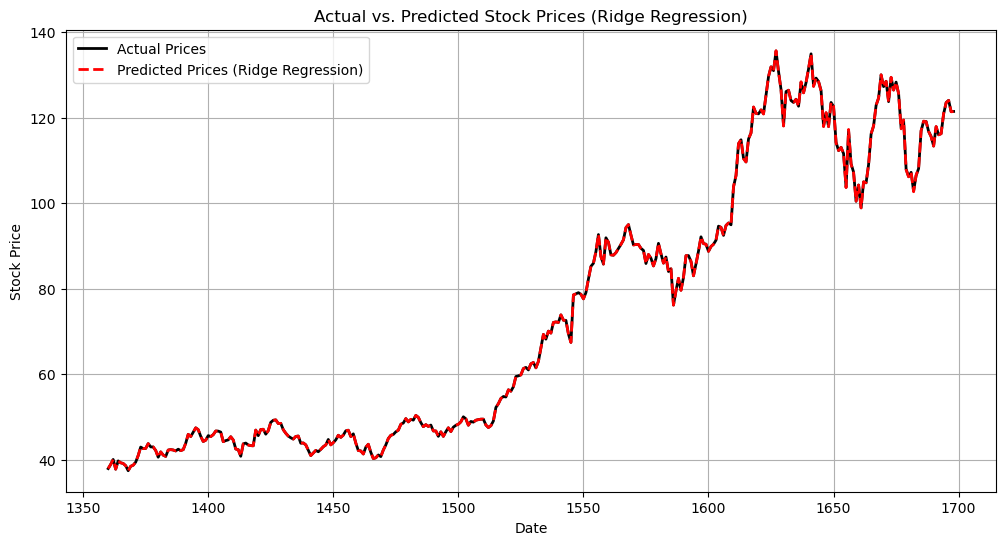

In [43]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))

plt.plot(y_test.index, y_test, label="Actual Prices", color="black", linewidth=2)
plt.plot(y_test.index, y_pred_lr, label="Predicted Prices (Ridge Regression)", color="red", linestyle="dashed", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices (Ridge Regression)")
plt.legend()
plt.grid()
plt.show()


In [44]:
# Recompute RMSE summary
rmse_summary = pd.DataFrame({
    "Model": ["Linear Regression", "ARIMA", "SARIMA", "ETS", "Random Forest","XG Boost"],
    "RMSE": [rmse_lr, rmse_arima, rmse_sarima, rmse_ets, rmse_rf,rmse_xgb]
}).sort_values(by="RMSE")

# Display the RMSE summary
rmse_summary


,Model,RMSE
0,Linear Regression,0.042910
4,Random Forest,0.326166
1,ARIMA,7.992842
3,ETS,8.630453
2,SARIMA,10.307202
5,XG Boost,46.558130


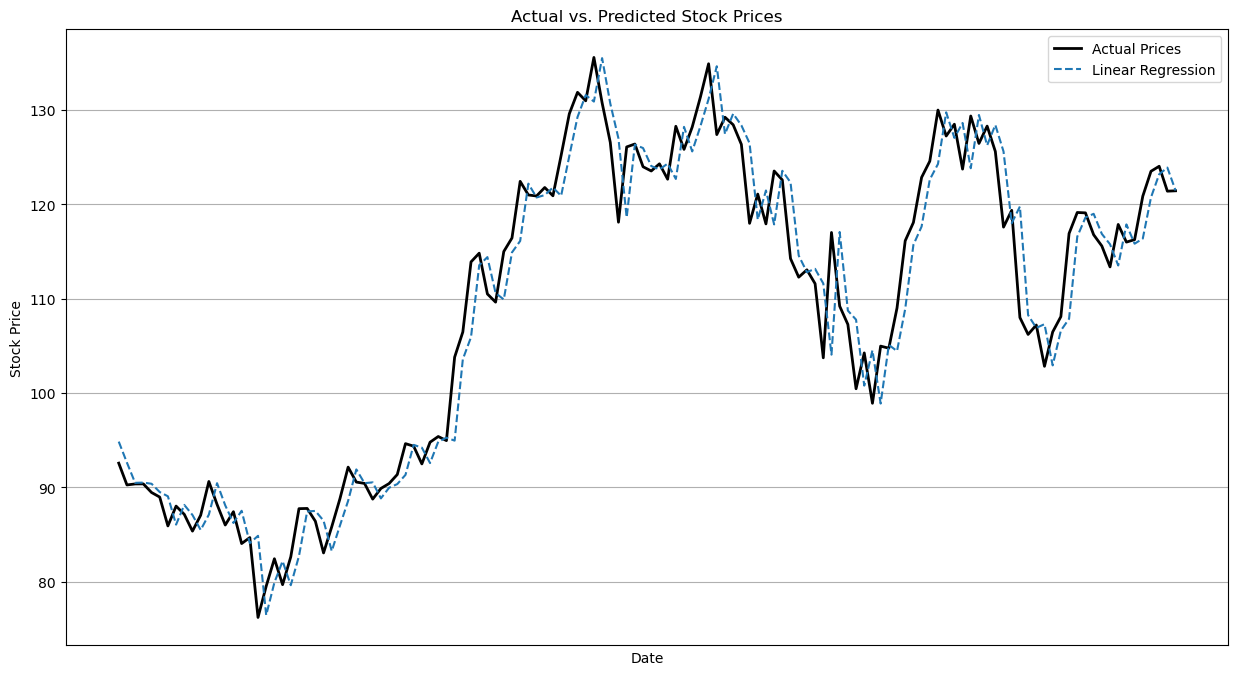

,Model,RMSE
0,Linear Regression,0.042910
4,Random Forest,0.326166
1,ARIMA,7.992842
3,ETS,8.630453
2,SARIMA,10.307202
5,XG Boost,46.558130


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure Date column is correctly referenced
if "Date" in df.columns:
    date_column = df["Date"].iloc[-len(y_test):].values  # Use 'Date' if it exists
else:
    date_column = df.index[-len(y_test):].values  # Use index if 'Date' is not present

# Find the minimum length among all arrays to ensure they match
min_length = min(len(date_column), len(y_test), len(y_pred_lr_1), len(y_pred_arima), 
                 len(y_pred_sarima), len(y_pred_ets), len(y_pred_rf), len(y_pred_xgb))

# Trim all arrays to the same length
date_column = date_column[-min_length:]
y_test = np.ravel(y_test[-min_length:])
y_pred_lr_1 = np.ravel(y_pred_lr_1[-min_length:])
y_pred_arima = np.ravel(y_pred_arima[-min_length:])
y_pred_sarima = np.ravel(y_pred_sarima[-min_length:])
y_pred_ets = np.ravel(y_pred_ets[-min_length:])
y_pred_rf = np.ravel(y_pred_rf[-min_length:])
y_pred_xgb = np.ravel(y_pred_xgb[-min_length:])

# Create DataFrame with aligned lengths
predictions_df = pd.DataFrame({
    "Date": date_column,
    "Actual": y_test,
    "Linear Regression": y_pred_lr_1,
    "ARIMA": y_pred_arima,
    "SARIMA": y_pred_sarima,
    "ETS": y_pred_ets,
    "Random Forest": y_pred_rf,
    "XG Boost": y_pred_xgb
}).set_index("Date")  # Set Date as index

# Convert index to datetime
predictions_df.index = pd.to_datetime(predictions_df.index)

# Plot actual vs. predicted values for each model
plt.figure(figsize=(15, 8))
plt.plot(predictions_df.index, predictions_df["Actual"], label="Actual Prices", color="black", linewidth=2)
plt.plot(predictions_df.index, predictions_df["Linear Regression"], label="Linear Regression", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

# Display RMSE summary
rmse_summary


               Model       RMSE
0  Linear Regression   0.042910
1      Random Forest   0.326166
2           XG Boost  46.558130
3             SARIMA  10.307202
4              ARIMA   7.992842
5                ETS   8.630453


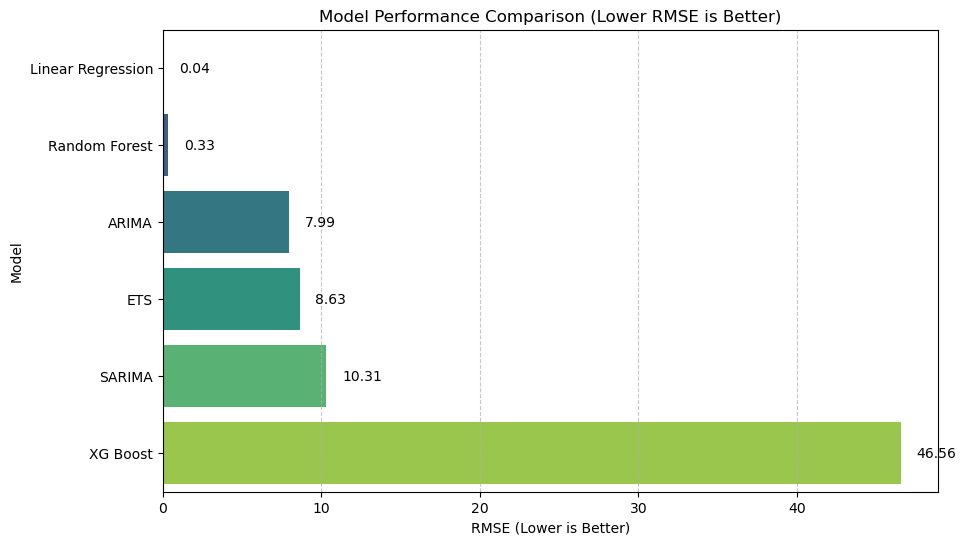

,Model,RMSE
0,Linear Regression,0.042910
1,Random Forest,0.326166
2,ARIMA,7.992842
3,ETS,8.630453
4,SARIMA,10.307202
5,XG Boost,46.558130


In [46]:
# Create a model summary DataFrame (previous results)
model_summary = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XG Boost", "SARIMA", "ARIMA","ETS"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb, rmse_sarima, rmse_arima, rmse_ets],
    #"Status": ["Best ✅", "Poor ❌", "Poor ❌", "Poor ❌", "Needs Tuning 🔄","medium","medium"]
})           

print(model_summary)

# Sort models by RMSE (lower is better)
model_summary = model_summary.sort_values(by="RMSE", ascending=True)

model_summary.reset_index(inplace=True)
model_summary.drop("index",axis=1,inplace=True)

# Plot the RMSE values
plt.figure(figsize=(10, 6))
sns.barplot(x="RMSE", y="Model", data = model_summary, palette="viridis")

# Annotate RMSE values on the bars
for index, row in model_summary.iterrows():
    plt.text(row["RMSE"] + 1, index, f"{row['RMSE']:.2f}", va="center")

plt.xlabel("RMSE (Lower is Better)")
plt.ylabel("Model")
plt.title("Model Performance Comparison (Lower RMSE is Better)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Display the summary DataFrame
model_summary


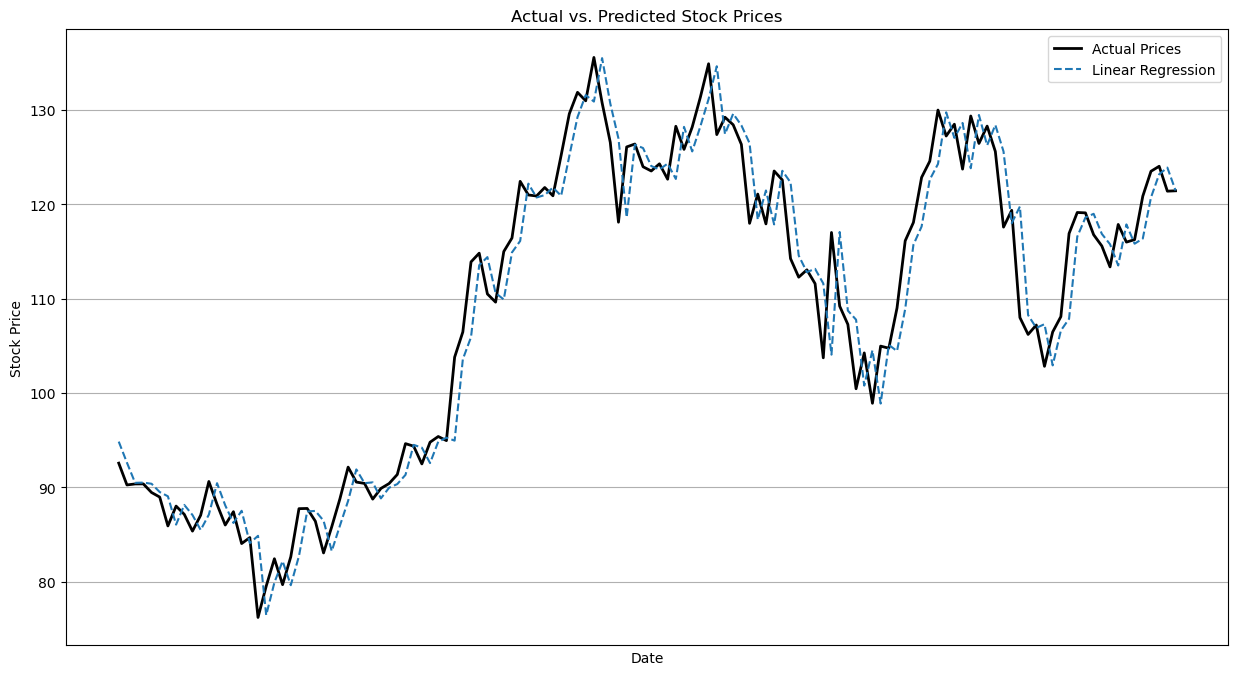

,Model,RMSE
0,Linear Regression,0.042910
4,Random Forest,0.326166
1,ARIMA,7.992842
3,ETS,8.630453
2,SARIMA,10.307202
5,XG Boost,46.558130


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure Date column is correctly referenced
if "Date" in df.columns:
    date_column = df["Date"].iloc[-len(y_test):].values  # Use 'Date' if it exists
else:
    date_column = df.index[-len(y_test):].values  # Use index if 'Date' is not present

# Find the minimum length among all arrays to ensure they match
min_length = min(len(date_column), len(y_test), len(y_pred_lr_1), len(y_pred_arima), 
                 len(y_pred_sarima), len(y_pred_ets), len(y_pred_rf), len(y_pred_xgb))

# Trim all arrays to the same length
date_column = date_column[-min_length:]
y_test = np.ravel(y_test[-min_length:])
y_pred_lr_1 = np.ravel(y_pred_lr_1[-min_length:])
y_pred_arima = np.ravel(y_pred_arima[-min_length:])
y_pred_sarima = np.ravel(y_pred_sarima[-min_length:])
y_pred_ets = np.ravel(y_pred_ets[-min_length:])
y_pred_rf = np.ravel(y_pred_rf[-min_length:])
y_pred_xgb = np.ravel(y_pred_xgb[-min_length:])

# Create DataFrame with aligned lengths
predictions_df = pd.DataFrame({
    "Date": date_column,
    "Actual": y_test,
    "Linear Regression": y_pred_lr_1,
    "ARIMA": y_pred_arima,
    "SARIMA": y_pred_sarima,
    "ETS": y_pred_ets,
    "Random Forest": y_pred_rf,
    "XG Boost": y_pred_xgb
}).set_index("Date")  # Set Date as index

# Convert index to datetime
predictions_df.index = pd.to_datetime(predictions_df.index)

# Plot actual vs. predicted values for each model
plt.figure(figsize=(15, 8))
plt.plot(predictions_df.index, predictions_df["Actual"], label="Actual Prices", color="black", linewidth=2)
plt.plot(predictions_df.index, predictions_df["Linear Regression"], label="Linear Regression", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

# Display RMSE summary
rmse_summary


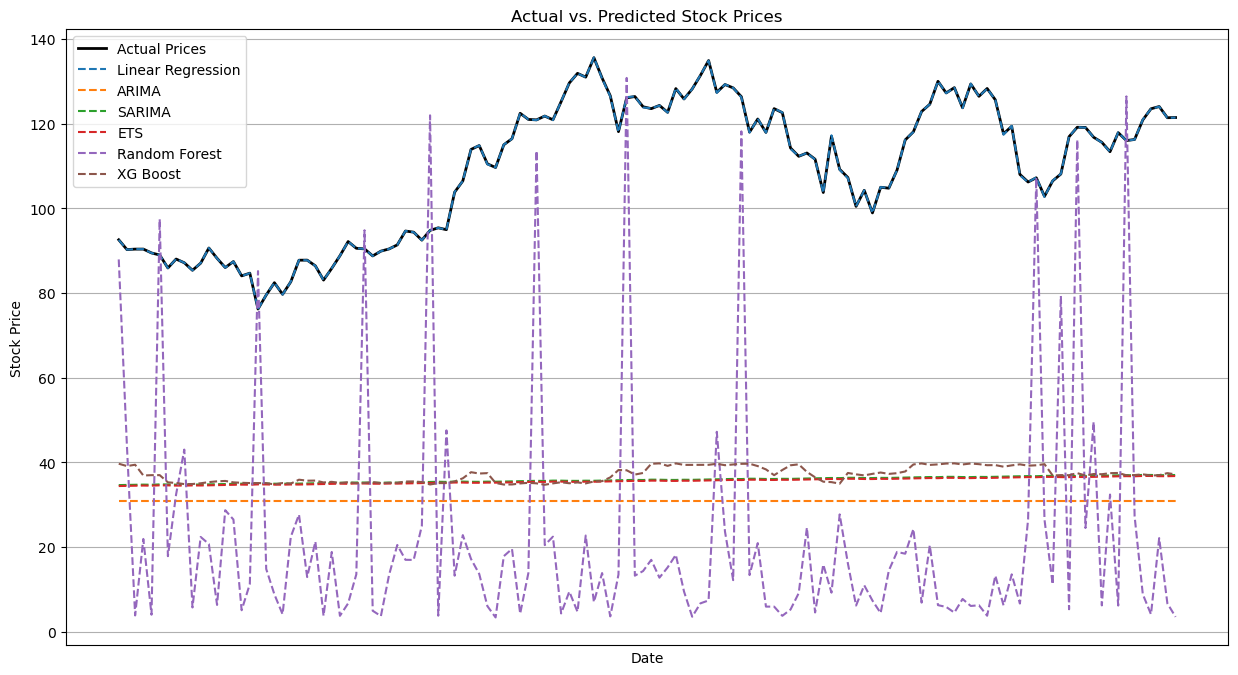

,Model,RMSE
0,Linear Regression,0.042910
4,Random Forest,0.326166
1,ARIMA,7.992842
3,ETS,8.630453
2,SARIMA,10.307202
5,XG Boost,46.558130


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure Date column is correctly referenced
if "Date" in df.columns:
    date_column = df["Date"].iloc[-len(y_test):].values  # Use 'Date' if it exists
else:
    date_column = df.index[-len(y_test):].values  # Use index if 'Date' is not present

# Find the minimum length among all arrays to ensure they match
min_length = min(len(date_column), len(y_test), len(y_pred_lr), len(y_pred_arima), 
                 len(y_pred_sarima), len(y_pred_ets), len(y_pred_rf), len(y_pred_xgb))

# Trim all arrays to the same length
date_column = date_column[-min_length:]
y_test = np.ravel(y_test[-min_length:])
y_pred_lr = np.ravel(y_pred_lr[-min_length:])
y_pred_arima = np.ravel(y_pred_arima[-min_length:])
y_pred_sarima = np.ravel(y_pred_sarima[-min_length:])
y_pred_ets = np.ravel(y_pred_ets[-min_length:])
y_pred_rf = np.ravel(y_pred_rf[-min_length:])
y_pred_xgb = np.ravel(y_pred_xgb[-min_length:])

# Create DataFrame with aligned lengths
predictions_df = pd.DataFrame({
    "Date": date_column,
    "Actual": y_test,
    "Linear Regression": y_pred_lr,
    "ARIMA": y_pred_arima,
    "SARIMA": y_pred_sarima,
    "ETS": y_pred_ets,
    "Random Forest": y_pred_rf,
    "XG Boost": y_pred_xgb
}).set_index("Date")  # Set Date as index

# Convert index to datetime
predictions_df.index = pd.to_datetime(predictions_df.index)

# Plot actual vs. predicted values for each model
plt.figure(figsize=(15, 8))
plt.plot(predictions_df.index, predictions_df["Actual"], label="Actual Prices", color="black", linewidth=2)
plt.plot(predictions_df.index, predictions_df["Linear Regression"], label="Linear Regression", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["ARIMA"], label="ARIMA", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["SARIMA"], label="SARIMA", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["ETS"], label="ETS", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["Random Forest"], label="Random Forest", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["XG Boost"], label="XG Boost", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

# Display RMSE summary
rmse_summary


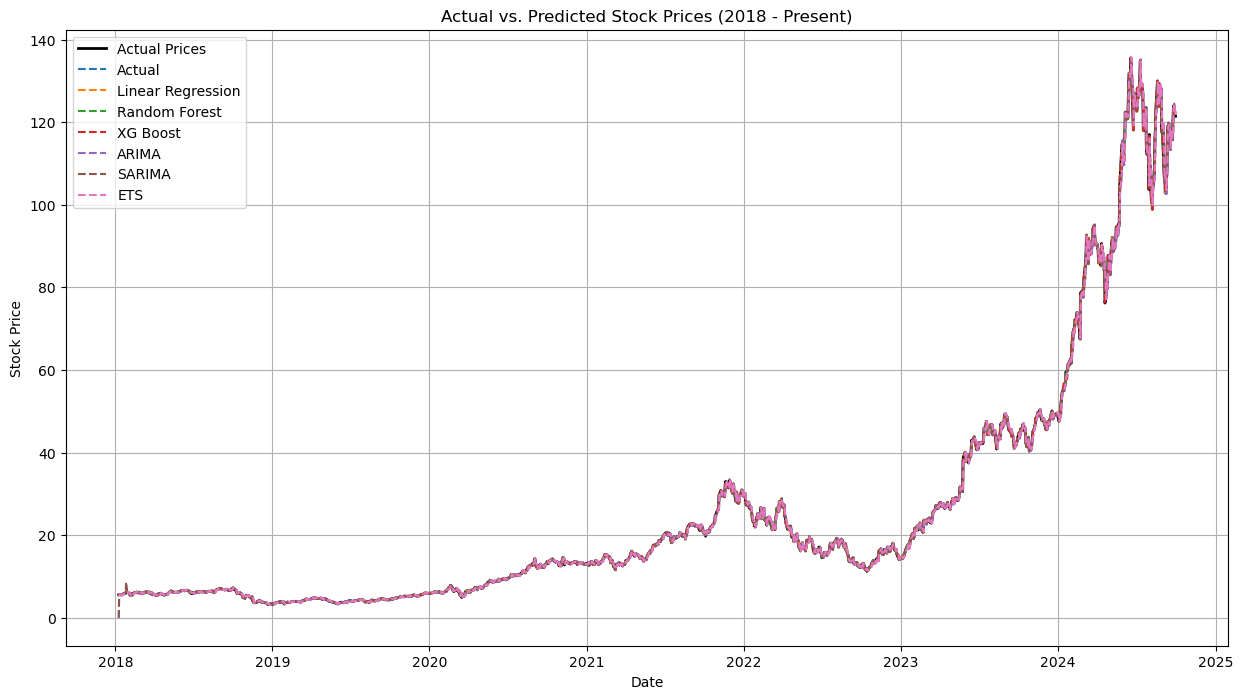

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

# Load dataset and ensure Date column is formatted
df["Date"] = pd.to_datetime(df["Price"])
df.set_index("Date", inplace=True)

# Define features for ML models
features = ["Close_Lag1", "Close_Lag2", "Close_Lag3", "Close_Lag4", "Close_Lag5", "Close_MA3", "Close_MA5"]
X = df[features].dropna()  # Remove NaN values
y = df["Close"].loc[X.index]  # Target variable

# Train Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X, y)
y_pred_lr = model_lr.predict(X)

# Train Random Forest Model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)
y_pred_rf = model_rf.predict(X)

# Train XGBoost Model
model_xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
model_xgb.fit(X, y)
y_pred_xgb = model_xgb.predict(X)

# Train ARIMA Model (using Close prices)
model_arima = ARIMA(df["Close"].dropna(), order=(5, 1, 0))
model_arima_fit = model_arima.fit()
y_pred_arima = model_arima_fit.predict(start=df.index[0], end=df.index[-1])

# Train SARIMA Model
model_sarima = SARIMAX(df["Close"].dropna(), order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
y_pred_sarima = model_sarima_fit.predict(start=df.index[0], end=df.index[-1])

# Train ETS Model
model_ets = ETSModel(df["Close"].dropna(), error="add", trend="add", seasonal="add", seasonal_periods=12)
model_ets_fit = model_ets.fit()
y_pred_ets = model_ets_fit.predict(start=df.index[0], end=df.index[-1])

# Create a DataFrame for predictions
full_predictions_df = pd.DataFrame({
    "Actual": df["Close"],
    "Linear Regression": np.nan,
    "Random Forest": np.nan,
    "XG Boost": np.nan,
    "ARIMA": np.nan,
    "SARIMA": np.nan,
    "ETS": np.nan
})

# Assign predictions where valid
full_predictions_df.loc[X.index, "Linear Regression"] = y_pred_lr
full_predictions_df.loc[X.index, "Random Forest"] = y_pred_rf
full_predictions_df.loc[X.index, "XG Boost"] = y_pred_xgb
full_predictions_df["ARIMA"] = y_pred_arima
full_predictions_df["SARIMA"] = y_pred_sarima
full_predictions_df["ETS"] = y_pred_ets

# Plot actual data and model predictions
plt.figure(figsize=(15, 8))
plt.plot(df.index, df["Close"], label="Actual Prices", color="black", linewidth=2)

# Plot predictions
for model_name in full_predictions_df.columns[:]:  # Exclude "Actual"
    plt.plot(df.index, full_predictions_df[model_name], label=model_name, linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices (2018 - Present)")
plt.legend()
plt.grid()
plt.show()


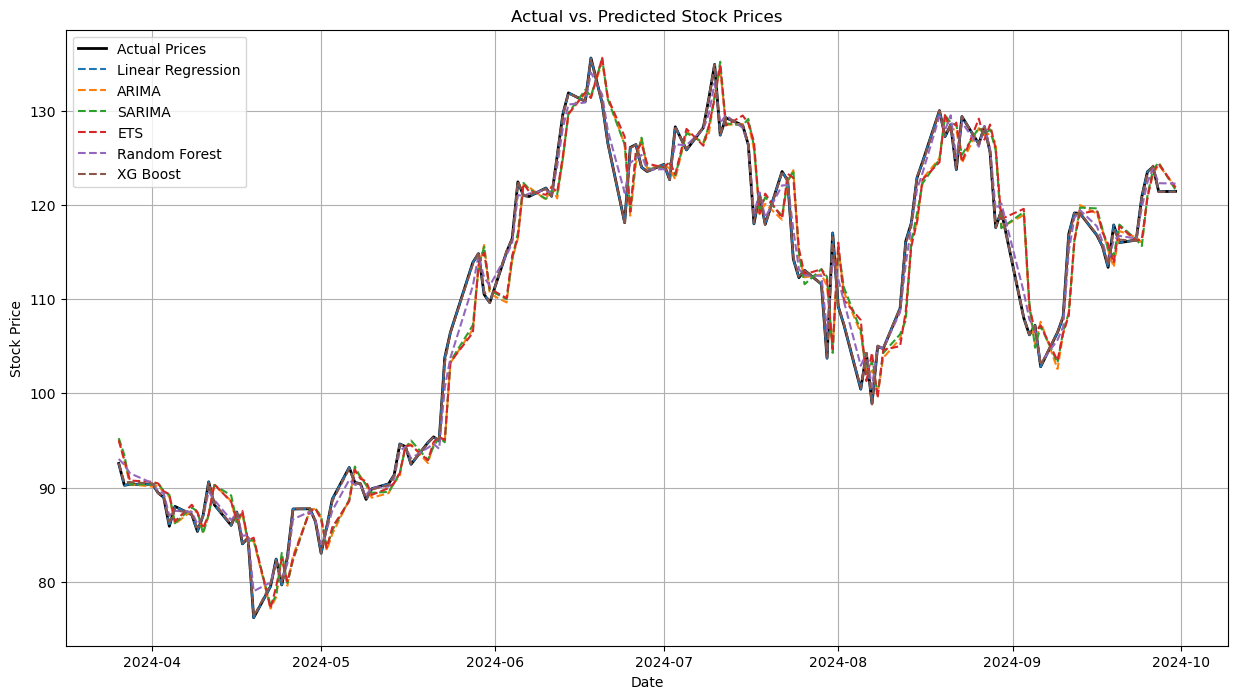

,Model,RMSE
0,Linear Regression,0.042910
4,Random Forest,0.326166
1,ARIMA,7.992842
3,ETS,8.630453
2,SARIMA,10.307202
5,XG Boost,46.558130


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure Date column is correctly referenced
if "Date" in df.columns:
    date_column = df["Date"].iloc[-len(y_test):].values  # Use 'Date' if it exists
else:
    date_column = df.index[-len(y_test):].values  # Use index if 'Date' is not present

# Find the minimum length among all arrays to ensure they match
min_length = min(len(date_column), len(y_test), len(y_pred_lr), len(y_pred_arima), 
                 len(y_pred_sarima), len(y_pred_ets), len(y_pred_rf), len(y_pred_xgb))

# Trim all arrays to the same length
date_column = date_column[-min_length:]
y_test = np.ravel(y_test[-min_length:])
y_pred_lr = np.ravel(y_pred_lr[-min_length:])
y_pred_arima = np.ravel(y_pred_arima[-min_length:])
y_pred_sarima = np.ravel(y_pred_sarima[-min_length:])
y_pred_ets = np.ravel(y_pred_ets[-min_length:])
y_pred_rf = np.ravel(y_pred_rf[-min_length:])
y_pred_xgb = np.ravel(y_pred_xgb[-min_length:])

# Create DataFrame with aligned lengths
predictions_df = pd.DataFrame({
    "Date": date_column,
    "Actual": y_test,
    "Linear Regression": y_pred_lr,
    "ARIMA": y_pred_arima,
    "SARIMA": y_pred_sarima,
    "ETS": y_pred_ets,
    "Random Forest": y_pred_rf,
    "XG Boost": y_pred_xgb
}).set_index("Date")  # Set Date as index

# Convert index to datetime
predictions_df.index = pd.to_datetime(predictions_df.index)

# Plot actual vs. predicted values for each model
plt.figure(figsize=(15, 8))
plt.plot(predictions_df.index, predictions_df["Actual"], label="Actual Prices", color="black", linewidth=2)
plt.plot(predictions_df.index, predictions_df["Linear Regression"], label="Linear Regression", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["ARIMA"], label="ARIMA", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["SARIMA"], label="SARIMA", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["ETS"], label="ETS", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["Random Forest"], label="Random Forest", linestyle="dashed")
plt.plot(predictions_df.index, predictions_df["XG Boost"], label="XG Boost", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

# Display RMSE summary
rmse_summary


# Deep Learning Techniques
* Long Short-Term Memory (LSTM)
* Gated Recurrent Unit (GRU)
* Transformers (Attention-Based Models)
> use this models to predict and forecast the nvidia stocks
> ## GRU

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.3962e-04 - val_loss: 8.8041e-04
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.3459e-04 - val_loss: 8.3161e-04
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.4026e-04 - val_loss: 7.8470e-04
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.0799e-04 - val_loss: 0.0012
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.0352e-04 - val_loss: 9.9671e-04
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 8.5669e-05 - val_loss: 7.3238e-04
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.0305e-04 - val_loss: 9.8923e-04
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.7732e-05 - val_loss: 7.1207e-04
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.6900e-05 - val_loss: 6.6544e-04
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.7618e-05 - val_loss

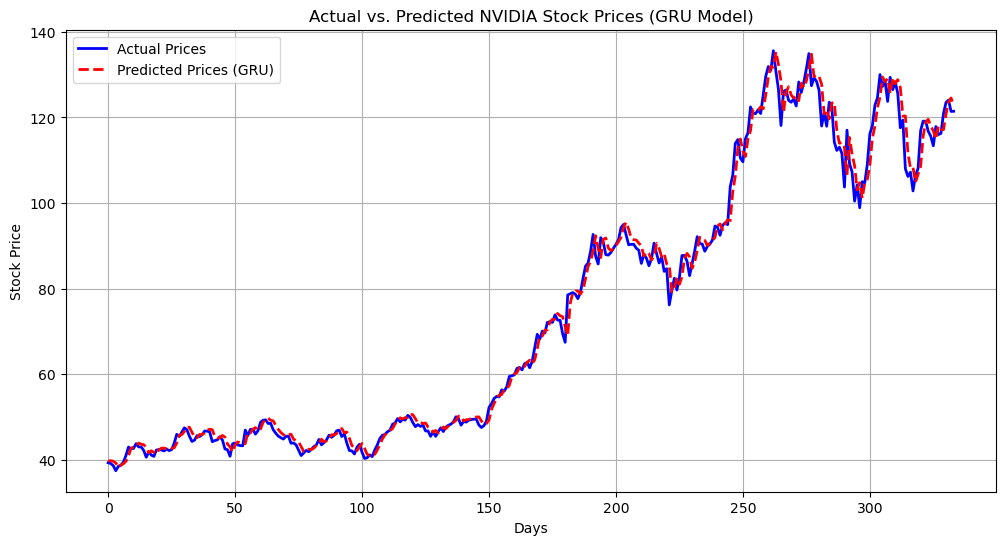

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=True)

df.drop([0,1],axis=0, inplace=True)
# Select target variable
target_col = "Close"
data = df[[target_col]]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 30 days of past data)
seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

# Split into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    GRU(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)

# Convert predictions back to original scale
y_pred1 = scaler.inverse_transform(y_pred_scaled)
y_test_actual1 = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
#rmse_gru = mean_squared_error(y_test_actual, y_pred, squared=False)
rmse_gru = np.sqrt(mean_squared_error(y_test_actual1, y_pred1))

print("GRU Model RMSE:", rmse_gru)

# Plot actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual1, label="Actual Prices", color="blue", linewidth=2)
plt.plot(y_pred1, label="Predicted Prices (GRU)", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted NVIDIA Stock Prices (GRU Model)")
plt.legend()
plt.grid()
plt.show()


## LSTM

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1916e-04 - val_loss: 0.0028
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5378e-04 - val_loss: 0.0019
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7889e-04 - val_loss: 0.0024
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1432e-04 - val_loss: 0.0023
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.2549e-04 - val_loss: 0.0014
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1689e-04 - val_loss: 0.0015
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.3044e-04 - val_loss: 0.0036
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 9.3724e-05 - val_loss: 0.0036
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.2032e-04 - val_loss: 0.0017
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.0157e-05 - val_loss: 0.0030
Epoch 12/50
84/84 ━━━━━

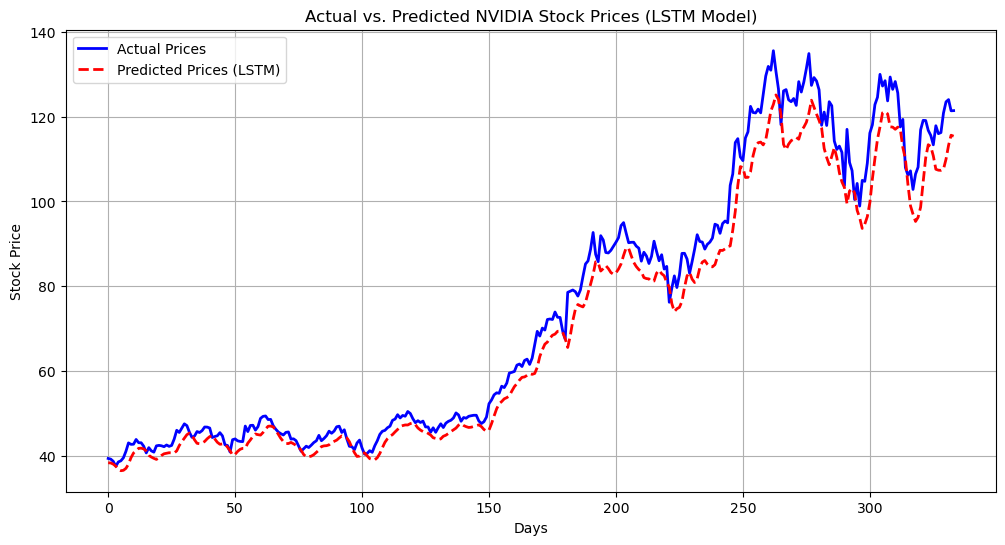

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv", parse_dates=True)

df.drop([0,1],axis=0, inplace=True)

# Select target variable
target_col = "Close"
data = df[[target_col]]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 30 days of past data)
seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

# Split into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)
])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)

# Convert predictions back to original scale
y_pred2 = scaler.inverse_transform(y_pred_scaled)
y_test_actual2 = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
#rmse_lstm = mean_squared_error(y_test_actual, y_pred, squared=False)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual2, y_pred2))

print("LSTM Model RMSE:", rmse_lstm)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual2, label="Actual Prices", color="blue", linewidth=2)
plt.plot(y_pred2, label="Predicted Prices (LSTM)", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted NVIDIA Stock Prices (LSTM Model)")
plt.legend()
plt.grid()
plt.show()


## Transformer

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0042 - val_loss: 0.1449
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0588e-04 - val_loss: 0.1264
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.6165e-04 - val_loss: 0.1126
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1728e-04 - val_loss: 0.1011
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8746e-04 - val_loss: 0.0938
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.5867e-04 - val_loss: 0.0810
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4928e-04 - val_loss: 0.0773
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4632e-04 - val_loss: 0.0734
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.1540e-04 - val_loss: 0.0701
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2069e-04 - val_loss: 0.0686
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2859e-04 - val_loss: 0.0640
Epoch 12/50
84/84 ━━━━━

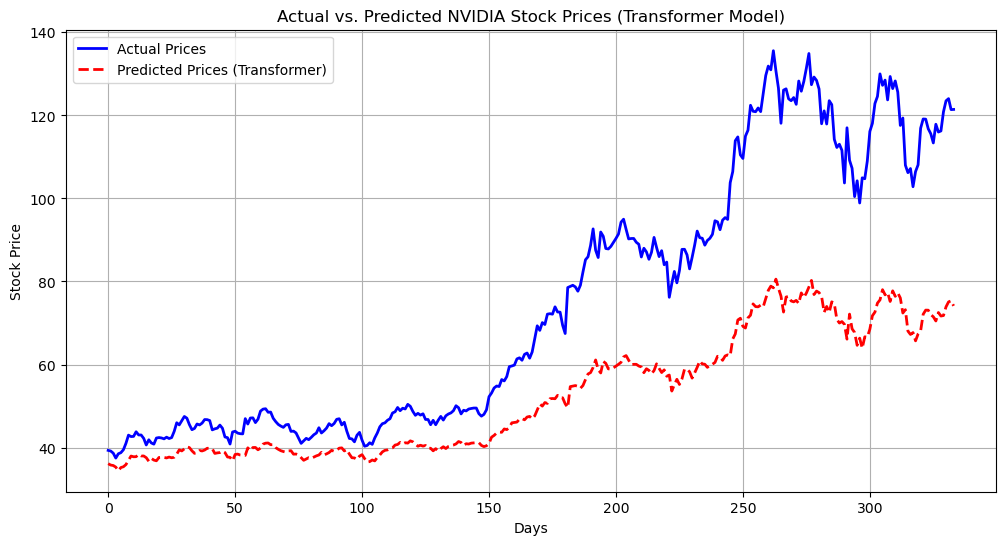

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("NVIDIA_STOCK.csv")

df.drop([0,1],axis=0, inplace=True)

# Select target variable
target_col = "Close"
data = df[[target_col]]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 30 days of past data)
seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

# Split into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Transformer Model Components
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs  # Residual connection

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res  # Another residual connection

# Build Transformer Model
input_layer = Input(shape=(seq_length, 1))
x = transformer_encoder(input_layer, head_size=64, num_heads=4, ff_dim=128)
x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)  # Output layer

model = Model(inputs=input_layer, outputs=x)
model.compile(optimizer="adam", loss="mse")

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)

# Convert predictions back to original scale
y_pred3 = scaler.inverse_transform(y_pred_scaled[:, -1, :])  # Extract last time step's prediction

y_test_actual3 = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
#rmse_transformer = mean_squared_error(y_test_actual, y_pred, squared=False)
rmse_transformer = np.sqrt(mean_squared_error(y_test_actual3, y_pred3))

print("Transformer Model RMSE:", rmse_transformer)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual3, label="Actual Prices", color="blue", linewidth=2)
plt.plot(y_pred3, label="Predicted Prices (Transformer)", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted NVIDIA Stock Prices (Transformer Model)")
plt.legend()
plt.grid()
plt.show()


In [54]:
# Create a summary dictionary

model_summary = {
    "Model": ["LSTM", "GRU", "Transformer"],
    "Layers": ["LSTM + Dense", "GRU + Dense", "Multi-Head Attention + FeedForward"],
    "Activation": ["ReLU, Tanh", "ReLU, Tanh", "ReLU, Softmax"],
    "Optimizer": ["Adam", "Adam", "Adam"],
    "RMSE": [rmse_lstm, rmse_gru, rmse_transformer],  # Replace with actual RMSE values
    "Observations": [
        "Good for long-term dependencies but slow training.",
        "Faster than LSTM, similar performance.",
        "Best for capturing global patterns but needs high computational power."
    ]
}

# Convert to DataFrame
df_summary = pd.DataFrame(model_summary)
df_summary

,Model,Layers,Activation,Optimizer,RMSE,Observations
0,LSTM,LSTM + Dense,"ReLU, Tanh",Adam,6.150167,Good for long-term dependencies but slow train...
1,GRU,GRU + Dense,"ReLU, Tanh",Adam,2.819538,"Faster than LSTM, similar performance."
2,Transformer,Multi-Head Attention + FeedForward,"ReLU, Softmax",Adam,27.906077,Best for capturing global patterns but needs h...


In [55]:
rmse_summary

,Model,RMSE
0,Linear Regression,0.042910
4,Random Forest,0.326166
1,ARIMA,7.992842
3,ETS,8.630453
2,SARIMA,10.307202
5,XG Boost,46.558130


### NOTE:-
* never do the stat models they have hight time complexity
* do some ML Models and DL models

# Others Ways of Doing

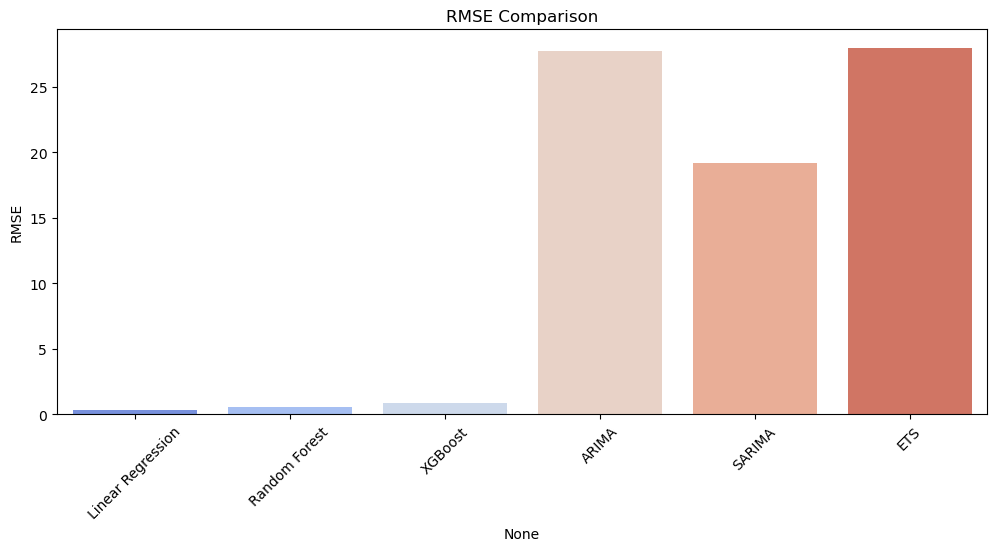

<Figure size 1200x500 with 0 Axes>

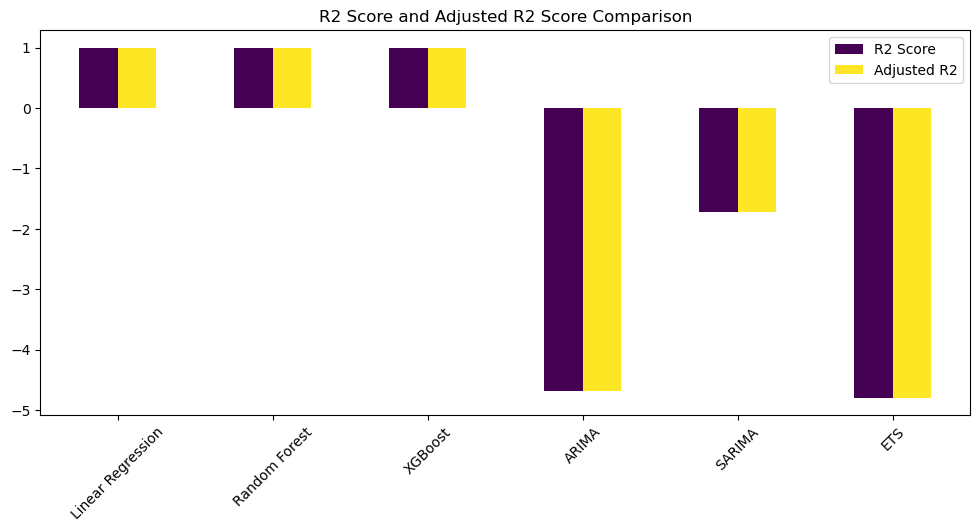

Final Model Evaluations:
                        RMSE  R2 Score  Adjusted R2
Linear Regression   0.348612  0.999860     0.999859
Random Forest       0.564827  0.999633     0.999629
XGBoost             0.870634  0.999129     0.999118
ARIMA              27.704343 -4.685142    -4.685142
SARIMA             19.157927 -1.718583    -1.718583
ETS                27.971034 -4.795123    -4.795123


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

# Load cleaned dataset
df = pd.read_csv("NVIDIA_STOCK.csv")
df = df.iloc[2:].reset_index(drop=True)
df.rename(columns={"Price": "Date"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
num_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

df.set_index("Date", inplace=True)

# Define features and target
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    results[name] = {"RMSE": rmse, "R2 Score": r2, "Adjusted R2": adj_r2}

# Time Series Models
def evaluate_time_series_model(model, order=None, seasonal_order=None):
    train, test = y.iloc[:-100], y.iloc[-100:]
    if model == 'ARIMA':
        model_fit = ARIMA(train, order=order).fit()
    elif model == 'SARIMA':
        model_fit = SARIMAX(train, order=order, seasonal_order=seasonal_order).fit()
    elif model == 'ETS':
        model_fit = ETSModel(train).fit()
    else:
        return None
    
    predictions = model_fit.forecast(steps=len(test))
    rmse = np.sqrt(mean_squared_error(test, predictions))
    r2 = r2_score(test, predictions)
    adj_r2 = 1 - (1-r2) * (len(test)-1)/(len(test)-1)
    results[model] = {"RMSE": rmse, "R2 Score": r2, "Adjusted R2": adj_r2}

evaluate_time_series_model("ARIMA", order=(5,1,0))
evaluate_time_series_model("SARIMA", order=(1,1,1), seasonal_order=(1,1,1,12))
evaluate_time_series_model("ETS")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Visualization
plt.figure(figsize=(12,5))
sns.barplot(x=results_df.index, y=results_df["RMSE"], palette="coolwarm")
plt.title("RMSE Comparison")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
results_df[["R2 Score", "Adjusted R2"]].plot(kind='bar', figsize=(12,5), colormap='viridis')
plt.title("R2 Score and Adjusted R2 Score Comparison")
plt.xticks(rotation=45)
plt.show()

print("Final Model Evaluations:")
print(results_df)


<Figure size 1200x600 with 0 Axes>

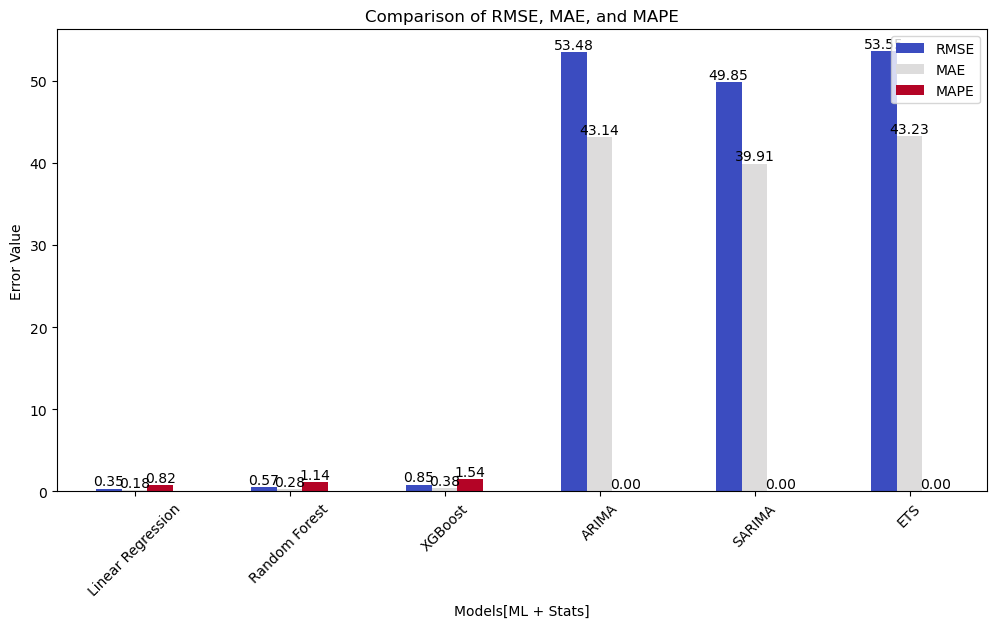

<Figure size 1200x500 with 0 Axes>

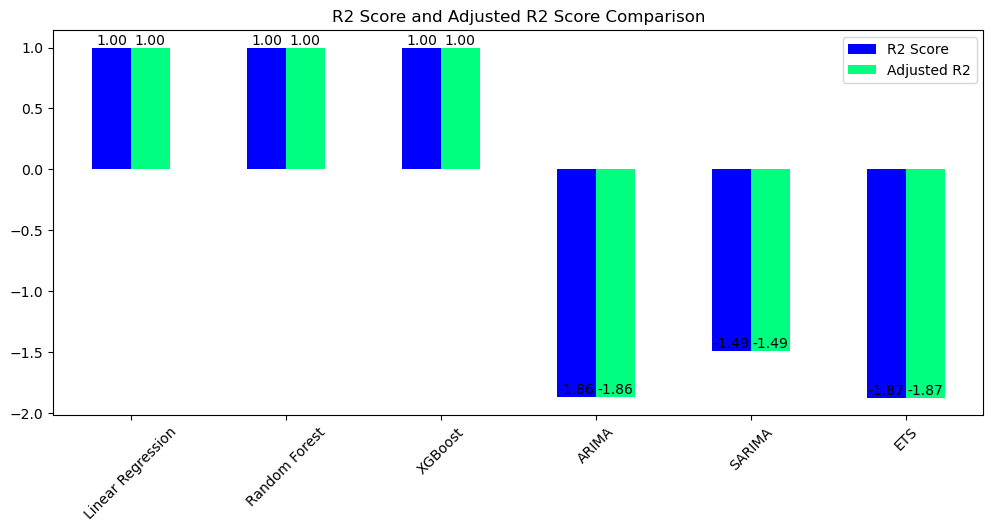

Final Model Evaluations:
                        RMSE        MAE      MAPE  R2 Score  Adjusted R2
Linear Regression   0.348612   0.180829  0.816606  0.999860     0.999859
Random Forest       0.571638   0.280168  1.139283  0.999624     0.999620
XGBoost             0.849901   0.384640  1.541330  0.999170     0.999160
ARIMA              53.476132  43.136337       NaN -1.862426    -1.862426
SARIMA             49.848948  39.905771       NaN -1.487289    -1.487289
ETS                53.553494  43.232095       NaN -1.870714    -1.870714


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from pmdarima import auto_arima

# Load cleaned dataset
df = pd.read_csv("NVIDIA_STOCK.csv")
df = df.iloc[2:].reset_index(drop=True)
df.rename(columns={"Price": "Date"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
num_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

df.set_index("Date", inplace=True)

# Define features and target
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
rf_params = {"n_estimators": [100, 200], "max_depth": [10, 20, None], "min_samples_split": [2, 5]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Hyperparameter tuning for XGBoost
xgb_params = {"n_estimators": [100, 200], "max_depth": [3, 6, 9], "learning_rate": [0.01, 0.1, 0.2]}
xgb_grid = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=42), xgb_params, cv=3, scoring='r2')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    results[name] = {"RMSE": rmse, "MAE": mae, "MAPE": mape, "R2 Score": r2, "Adjusted R2": adj_r2}

# Time series forecasting models
def evaluate_time_series_model(model_name):
    train, test = y[:int(0.8*len(y))], y[int(0.8*len(y)):]
    
    if model_name == "ARIMA":
        model = ARIMA(train, order=(5,1,0)).fit()
        predictions = model.forecast(steps=len(test))
    elif model_name == "SARIMA":
        model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,1,12)).fit()
        predictions = model.forecast(steps=len(test))
    elif model_name == "ETS":
        model = ETSModel(train).fit()
        predictions = model.forecast(steps=len(test))
    else:
        return
    
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mae = mean_absolute_error(test, predictions)
    mape = np.mean(np.abs((test - predictions) / test)) * 100
    r2 = r2_score(test, predictions)
    adj_r2 = 1 - (1-r2) * (len(test)-1)/(len(test)-1)
    
    results[model_name] = {"RMSE": rmse, "MAE": mae, "MAPE": mape, "R2 Score": r2, "Adjusted R2": adj_r2}

# Evaluate time series models
evaluate_time_series_model("ARIMA")
evaluate_time_series_model("SARIMA")
evaluate_time_series_model("ETS")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Visualization of RMSE, MAE, and MAPE in a single plot with annotations
plt.figure(figsize=(12,6))
ax = results_df[["RMSE", "MAE", "MAPE"]].plot(kind='bar', figsize=(12,6), colormap='coolwarm')
plt.title("Comparison of RMSE, MAE, and MAPE")
plt.xticks(rotation=45)
plt.xlabel("Models[ML + Stats]")
plt.ylabel("Error Value")
plt.legend(loc='upper right')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

# Visualization of R2 Score and Adjusted R2 Score with annotations
plt.figure(figsize=(12,5))
ax2 = results_df[["R2 Score", "Adjusted R2"]].plot(kind='bar', figsize=(12,5), colormap='winter')
plt.title("R2 Score and Adjusted R2 Score Comparison")
plt.xticks(rotation=45)

# Add annotations
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

print("Final Model Evaluations:")
print(results_df)

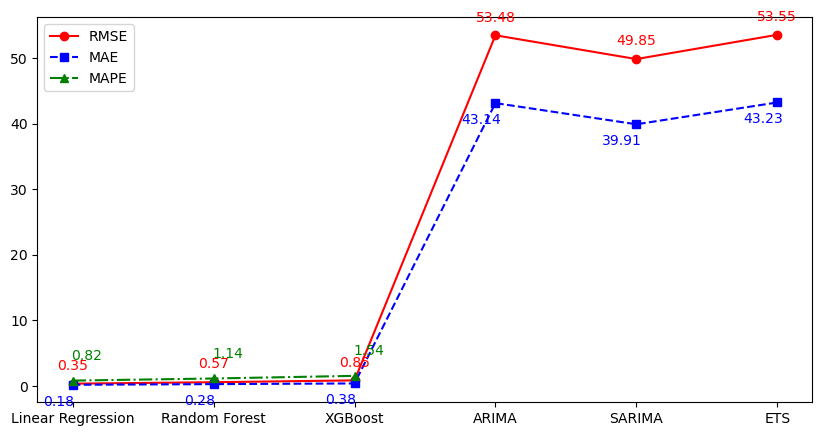

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample MAE, RMSE, MAPE results from different models (replace with actual results)
model_results = results_df.loc[:, ["RMSE", "MAE", "MAPE"]]

# Convert the results to a DataFrame with proper column names
model_df = model_results.reset_index()

# Rename columns for clarity
model_df.columns = ["Model", "RMSE", "MAE", "MAPE"]

# Plot MAE as a line plot
# Create the line plot
plt.figure(figsize=(10, 5))

# Define x-axis positions to slightly shift MAE and MAPE annotations
x_vals = np.arange(len(model_df["Model"]))  # Numeric positions for x-axis

# Plot RMSE
plt.plot(model_df["Model"], model_df["RMSE"], marker='o', linestyle='-', color='r', label='RMSE')
for i, txt in enumerate(model_df["RMSE"]):
    plt.annotate(f'{txt:.2f}', (x_vals[i], model_df["RMSE"][i]), textcoords="offset points", xytext=(0, 10), ha='center', color='r', fontsize=10)

# Plot MAE with slight x-shift for better readability
plt.plot(model_df["Model"], model_df["MAE"], marker='s', linestyle='--', color='b', label='MAE')
for i, txt in enumerate(model_df["MAE"]):
    plt.annotate(f'{txt:.2f}', (x_vals[i] - 0.1, model_df["MAE"][i]), textcoords="offset points", xytext=(0, -15), ha='center', color='b', fontsize=10)

# Plot MAPE with another x-shift in the opposite direction
plt.plot(model_df["Model"], model_df["MAPE"], marker='^', linestyle='-.', color='g', label='MAPE')
for i, txt in enumerate(model_df["MAPE"]):
    if not pd.isna(txt):  # Avoid annotating NaN values
        plt.annotate(f'{txt:.2f}', (x_vals[i] + 0.1, model_df["MAPE"][i]), textcoords="offset points", xytext=(0, 15), ha='center', color='g', fontsize=10)

plt.legend()
plt.show()


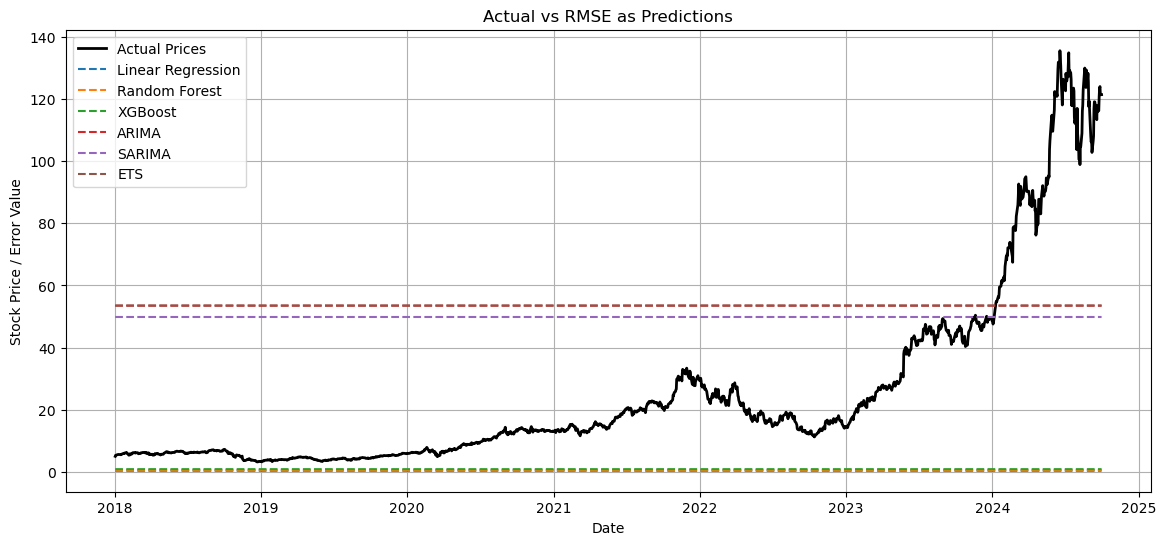

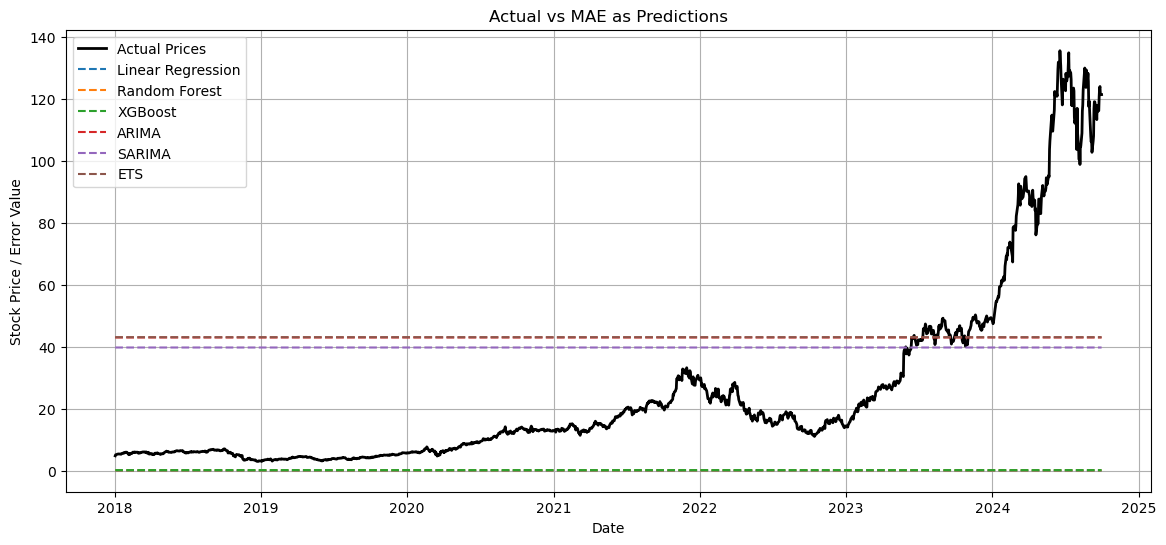

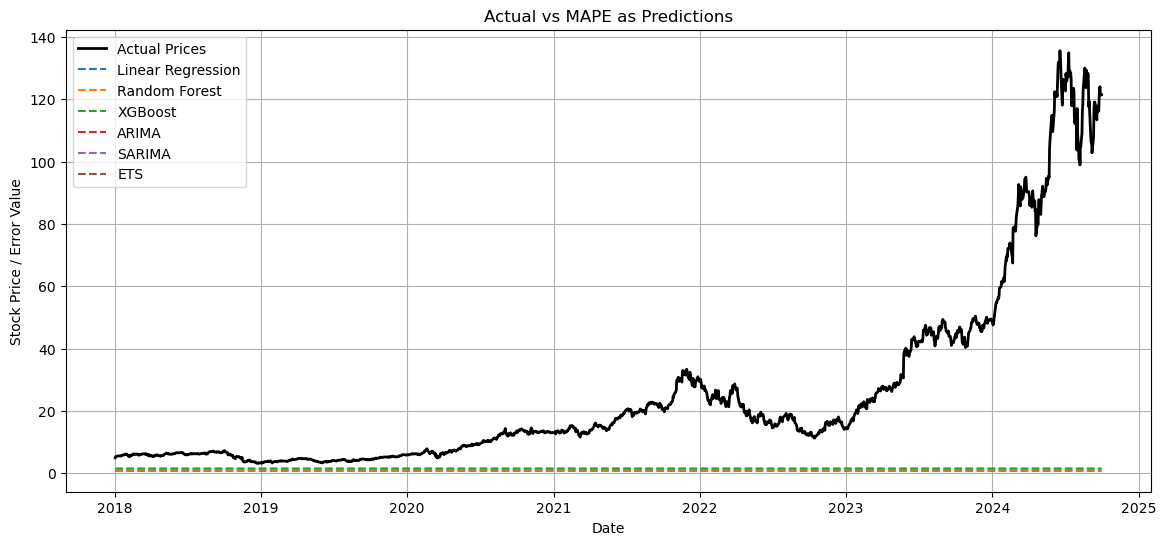

In [59]:
# Create separate plots for RMSE, MAE, and MAPE as predictions

# Function to plot actual data with evaluation metric as prediction
def plot_metric_as_prediction(metric, metric_name, color):
    plt.figure(figsize=(14, 6))
    
    # Plot actual stock prices
    plt.plot(y.index, y, label="Actual Prices", color='black', linewidth=2)
    
    # Plot each model's metric as the prediction line
    for model in results_df.index:
        plt.plot(y.index, [results_df.loc[model, metric]] * len(y), linestyle='--', label=model, linewidth=1.5)
    
    plt.title(f"Actual vs {metric_name} as Predictions")
    plt.xlabel("Date")
    plt.ylabel("Stock Price / Error Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot with RMSE as prediction
plot_metric_as_prediction("RMSE", "RMSE", "red")

# Plot with MAE as prediction
plot_metric_as_prediction("MAE", "MAE", "blue")

# Plot with MAPE as prediction
plot_metric_as_prediction("MAPE", "MAPE", "green")


# Final Conclusion:-
## Pros:
* Use the ML Models {Linear Regression, Random Forest, XG Boost} whose have the lesser error rate 
* Higher R^2 score, adjusted R^2 score for ML Models
* MAE has the least Error rate among the Other Evaluation Metrics
* Error rate of evaluation Metric Order : MAE, MAPE and RMSE
* Use the DL Models like LSTM's, GRU's

## Cons:
* Statistical Models {ARIMA, SARIMA, ETS} are the worst models to train on this Dataset
* There is no MAPE values for Stat Models
* R^2 Score and Adjusted R^2 Score for Stat models was -ve